
# PROJECT 3
# ANALYSIS OF DISCRETE RANDOM VARIABLES

* $\textbf{NAME: Ruchin Patel}$
* $\textbf{USC ID: 9520665364}$
* $\textbf{Email: ruchinpa@usc.edu}$

# Problem Statement

* $\textbf{Sum of Uniform RVs}$: N is a random variable  such that N = Min{n: $ \sum_{i=1}^{n} U_i > 1$} and where $U_i$ are uniform random variables. Find E[N].


* $\textbf{Minima of Uniform RV's}$: N = Min{n: $U_1$ <= $U_2$ <=....$U_{n-1}$ > $U_n$}. i.e. the nth term is the first that is less than its predecessor, where {Ui} are independent
identically distributed (iid) Uniform(0,1) RV’s.
Find (by simulation): E[ N ] an estimator for the mean.



* $\textbf{Maxima of Uniform RV's}$: $U_j$ > $max_{i=1:j-1}$  {$U_i$}. Example: the records are underlined.{Ui}={0.2314,0.4719,0.1133,0.5676,0.4388,0.9453,....}(note that the Ui are on the real line and we are just showing 4 digits of precision). st th Let Xi be an RV for the distance from the i-1 record to the i record. Clearly X1=1 always. In this example, X2=1, X3=2, X4=2. Distribution of Records: Using simulation, obtain (and graph) a probability histogram for X2 and X3 and compute the sample means. Find an analytical expression for P( X2 = k ) ? 

#  THEORETICAL EXPLORATION

* $\textbf{Uniform random variable}$:For a uniform random variable X ~ U(a,b) the equations of mean and variance are as follows:

    *  $E[X] = \mu = \frac{(a+b)}{2}$

    *  $var(X) = \sigma_X^2 = \frac{a^2+ab+b^2}{12}$
  
* $\textbf{Central Limit Theorem}$: The central limit theorem states that if we have a population with mean $\mu$ and variance $\sigma_X^2$ then if we take random samples from that population then the sample means of those samples would be normally distributed with mean $\mu$ and variance $\frac{\sigma_X^2}{n}$ where n is the size of each sample.

* $\textbf{Euler's number e}$: As we know 'e' is an irrational number with its value being e = 2.71828... We also know that $\lim_{n\to\infty} (1+\frac{1}{n})^n = e$. Thus if n is very large then the value of the given equation would be equal to the euler's constant.

# SIMULATION METHODOLOGY

* The below provided flow charts will be representative of the function definitions mentioned below which used to simulate the 3 methods namely 'sum of Uniform RV's', 'Minima of Uniform RV's' and 'Maxima of Uniform RV's'.

* $\textbf{Uniform random variable}$: In order to find the mean of this random variable we will first generate a sample of m values and create N such samples. In this way we can better estimate the mean as per the central Limit theorem we can also find the confidence interval.

THE FLOW CHART OF SUM OF UNIFORM RV's


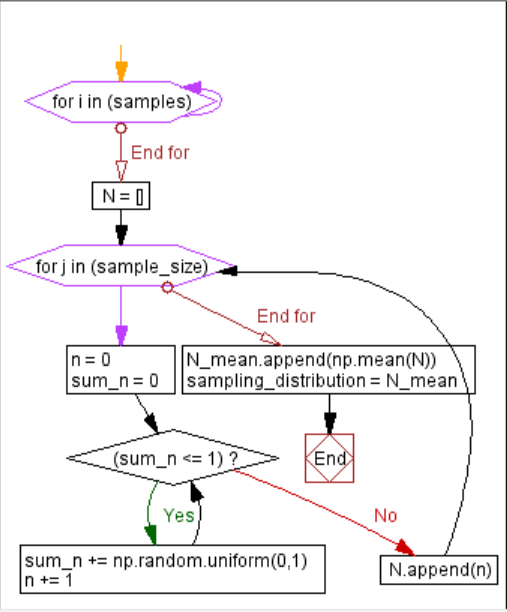

In [20]:
from IPython.display import Image
print("THE FLOW CHART OF SUM OF UNIFORM RV's")
Image("sum_of_uniform.PNG")


* $\textbf{Minima of Uniform random variable}$: In order to find the mean of this random variable we will first generate a sample of m values and create N such samples. In this way we can better estimate the mean as per the central Limit theorem we can also find the confidence interval.

THE FLOW CHART OF MINIMA OF UNIFORM RV's


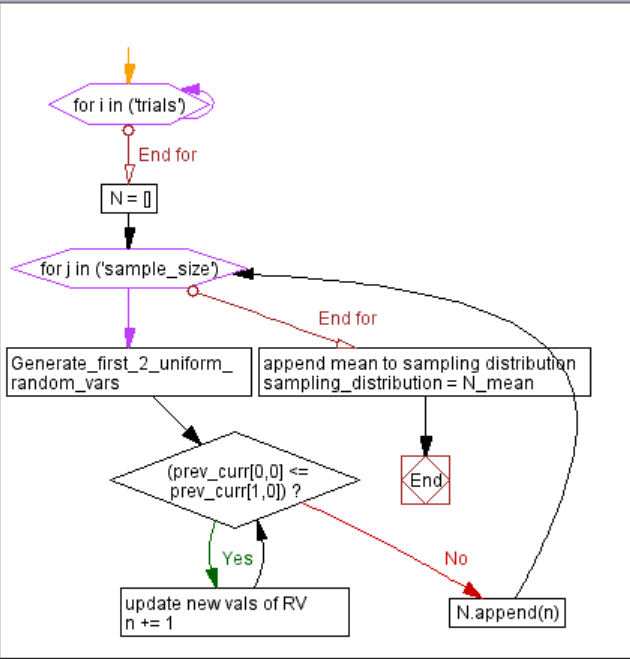

In [15]:
print("THE FLOW CHART OF MINIMA OF UNIFORM RV's")
Image("Minima_of_RV.JPG.PNG")

* $\textbf{Maxima Uniform random variable}$: Here we generate a uniform random variable tile the 3rd record is found. We continue this for n number of times, calculate the mean of these n number of trials and repeat this experiment another m number of times therby creating our sampling distribution. In theory according to the central limit theorem this sampling distribution should have a mean which is close to E[X_2].

THE FLOW CHART OF Maxima OF UNIFORM RV's


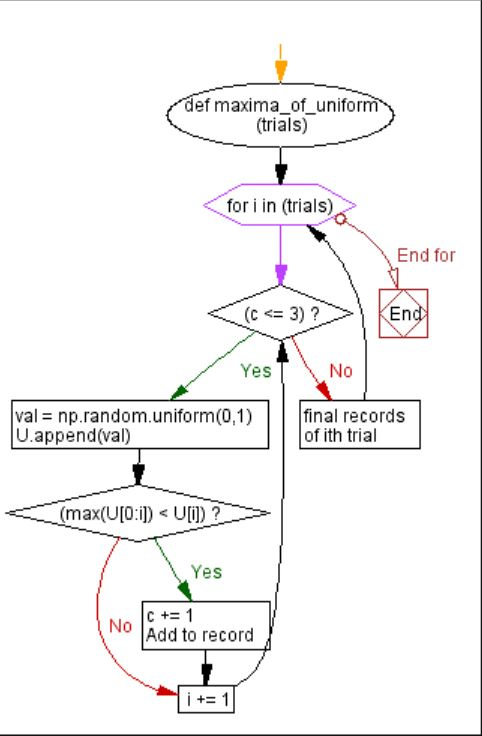

In [21]:
print("THE FLOW CHART OF Maxima OF UNIFORM RV's")
Image("MAXIMA_of_RV.JPG")

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.RandomState(seed=42)
import warnings
from scipy.stats import mode
warnings.filterwarnings('ignore')

In [253]:
def plot_densityCurve(*args):
    print("The mean of sampling distribution for",args[8]," is: ",args[5])
    print("The standard error(st_dev of sampling distribution is) of ",args[8]," is:",args[6])
    print("The lower value of 95% confidence level of ",args[8]," is",args[5]-(1.96*args[6]))
    print("The upper value of 95% confidence level of ",args[8]," is",args[5]+(1.96*args[6]))
    
    plt.figure(figsize=(9,4), dpi=300)
    sns.distplot(args[0],kde_kws=args[1],hist_kws=args[2])
    l1 = 'sample mean'+' '+str(round(args[5], 2))
    plt.axvline(args[5], color='green', linestyle='-.', linewidth=1,label=l1)
    plt.axvline(args[5]-args[6], color='black', linestyle=':', linewidth=1,label='1 standard dev')
    plt.axvline(args[5]+args[6], color='black', linestyle=':', linewidth=1)
    l2 = 'True value '+str(args[7])
    plt.axvline(args[7], color='purple', linestyle='-.', linewidth=2,label=l2)
    plt.axvline(args[5]-(1.96*args[6]),color='black',linewidth=2,label='95% confidence line')
    plt.axvline(args[5]+(1.96*args[6]),color='black',linewidth=2)
    plt.legend()
    plt.title("The sampling distribution of "+args[8] +" with "+str(args[3])+" samples of size n="+str(args[4]))
    plt.show()

def generate_plot(**kwargs):
    dist = np.array(kwargs['dist'])
    method = kwargs['method']
    trials = kwargs['trials']
    sample_size = kwargs['samp_size']
    
    P_hat = np.mean(dist)
    std_sampling_dist = np.std(dist)
    print("The mean of sampling distribution for",method," is: ",P_hat)
    print("The standard error(st_dev of sampling distribution is) of ",method," is:",std_sampling_dist)
    
    plt.figure(figsize=(9,4), dpi=300)    
    plt.hist(dist,normed=True,color=kwargs['h_c']['hist_c'],edgecolor=kwargs['h_c']['hist_e'],alpha=0.4,bins=30,label='PDF')
    plt.twinx()
    plt.hist(dist,cumulative=True,normed=True,color=kwargs['h_c']['hist_c_c'],edgecolor=kwargs['h_c']['hist_c_e'],alpha=0.2,bins=30,label='CDF')
    plt.title('The Histogram with cdf of sampling distribution of'+method)
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(9,4), dpi=300)
    density_dic = kwargs['sns_d']
    hist_dic = kwargs['sns_h']
    sns.distplot(dist,kde_kws=density_dic,hist_kws=hist_dic,bins=15)
    plt.title('Distribution of '+method+' with sample size: '+str(trials)+' and total samples: '+str(sample_size))
    plt.show()
    
#def plot_densityCurve(*args):

def single_trial_sum(c,method):
    
    np.random.seed(4)
    N = []
    for j in range(1000):
        n = 0
        sum_n = 0
        while(sum_n <= 1):
            #print('here')
            sum_n += np.random.uniform(0,1)
            n += 1
            #print(n)
        N.append(n)
        
    np.sort(N)
    plt.figure(figsize=(9,4), dpi=300)
    plt.hist(N,normed=True,color=c,bins=10,label='PDF')
    plt.twinx()
    plt.hist(N,normed=True,cumulative=True,color='green',alpha=0.2,bins=50,edgecolor='red',label='CDF')
    plt.xlabel('Value of N')
    plt.ylabel('frequency')
    plt.title('PDF of '+method)
    plt.legend()
    plt.show()
    mean = np.mean(N)
    std = np.std(N)
    SE = std/np.sqrt(1000)
    print('The expected value of N(point estimate) with method ',method,' is: ',mean)
    print('The standard deviation of N with method ',method,' is: ',std)
    print('The standard error of sampling distribution of N with method ',method,' is: ',SE)
    
    return mean,std,SE

def single_trial_minima(c,method):
    np.random.seed(4)
    N = []
    for j in range(1000):
        prev_curr = np.ones((2,1))
        prev_curr[0,0] = np.random.uniform(0,1)
        prev_curr[1,0] = np.random.uniform(0,1)
        n = 2
        while(prev_curr[0,0] <= prev_curr[1,0]):
            current = np.random.uniform(0,1)
            prev_curr[0,0] = prev_curr[1,0]
            prev_curr[1,0] = current
                
            n += 1
                #print(n)
        N.append(n)
        
     
    np.sort(N)
    plt.figure(figsize=(9,4), dpi=300)
    plt.hist(N,normed=True,color=c,bins=10,label='PDF')
    plt.twinx()
    plt.hist(N,normed=True,cumulative=True,color='green',alpha=0.2,bins=50,edgecolor='red',label='CDF')
    plt.xlabel('Value of N')
    plt.ylabel('frequency')
    plt.title('PDF of '+method)
    plt.legend()
    plt.show()
    mean = np.mean(N)
    std = np.std(N)
    SE = std/np.sqrt(1000)
    print('The expected value of N(point estimate) with method ',method,' is: ',mean)
    print('The standard deviation of N with method ',method,' is: ',std)
    print('The standard error of sampling distribution of N with method ',method,' is: ',SE)
    
    return mean,std,SE
        
    

def generate_distribution(**kwargs):
    
    np.random.seed(4)
    sampling_distribution = list()
    if(kwargs['method'] == 'sum_of_uniform'):
       
        mean_values = []
        sum_n = 0
        N_mean = []
        n = 0
        i = 0
    
        for i in range(0,kwargs['trials']):
            N = []
            for j in range(0,kwargs['sample_size']):
                n = 0
                sum_n = 0
                while(sum_n <= 1):
                    #print('here')
                    sum_n += np.random.uniform(0,1)
                    n += 1
                #print(n)
                N.append(n)
            
            N_mean.append(np.mean(N))
        
        sampling_distribution = N_mean
    
    else:
    
        mean_values = []
        N_mean = []
        n = 0
    
        for i in range(0,kwargs['trials']):
            N = []
            for j in range(0,kwargs['sample_size']):
            
                prev_curr = np.ones((2,1))
                prev_curr[0,0] = np.random.uniform(0,1)
                prev_curr[1,0] = np.random.uniform(0,1)
                n = 2
                while(prev_curr[0,0] <= prev_curr[1,0]):
                    current = np.random.uniform(0,1)
                    prev_curr[0,0] = prev_curr[1,0]
                    prev_curr[1,0] = current
                
                    n += 1
                #print(n)
                N.append(n)
            
            N_mean.append(np.mean(N))
        
        sampling_distribution = N_mean
    
    return sampling_distribution
        



    
        
def maxima_of_uniform(trials):
    
    np.random.seed(4)
    X_2 = []
    X_3 = []
    for i in range(0,trials):
        U = []
        Rec = dict()
        c = 1
        val = np.random.uniform(0,1)
        U.append(val)
        Rec[c] = (1,0)
        i = 1
        while(c <= 3):
            val = np.random.uniform(0,1)
            U.append(val)
            if(np.max(U[0:i]) < U[i]):
                c += 1
                Rec[c] = (i - Rec[c-1][1],i)
            i += 1
    
        X_2.append(Rec[2][0])
        try :
            X_3.append(Rec[3][0])
        except:
            print(U)
        
        #print(X_2)
        #print(X_3)
    
    X_2 = np.array(X_2)
    X_3 = np.array(X_3)
    
    X_2_t = X_2[X_2 < 30]
    X_3_t = X_3[X_3 < 30]
    print('Sample Mean of X_2 is:',np.mean(X_2_t))
    print('Sample mean of X_3 is:',np.mean(X_3_t))
    
    
    plt.figure(figsize=(9,4), dpi=300)
    hist_dic = {'color':'red','alpha':0.8}
    sns.distplot(X_2,hist_kws=hist_dic,bins=100)
    plt.xlim(-1,60)
    plt.xlabel('x ->')
    plt.ylabel('P(X_2)')
    plt.title('The pdf of X_2')
    plt.show()
    
    plt.figure(figsize=(9,4), dpi=300)
    hist_dic = {'color':'orange','alpha':0.8}
    sns.distplot(X_3,hist_kws=hist_dic,bins=100)
    plt.xlim(-5,100)
    plt.xlabel('x ->')
    plt.ylabel('P(X_3)')
    plt.title('The pdf of X_3')
    plt.show()
    
    


        
        
               
        
    

# EXPERIMENTS AND RESULTS

## 1.) N is a random variable  such that N = Min{n: $ \sum_{i=1}^{n} U_i > 1$} and where $U_i$ are uniform random variables. Find E[N].

* In this part we produce the simulations according to the code written above. We will be creating a sampling distribution of the experiment mentioned in part 1 where we are supposed to capture the mean of the total number of entries of a uniform random variable needed to so that their sum is greater than 1.

* For this we conduct many such experimnts and create a sampling distribution. We do this because the central limit theorem states that the mean of a such a sampling distribution would be close to the true mean of the random variable. 

* Thus we would be able to generate a range of values which would tell us how confident we are that the population parameter lies within this range i.e How confident we are that the True mean lies within range.


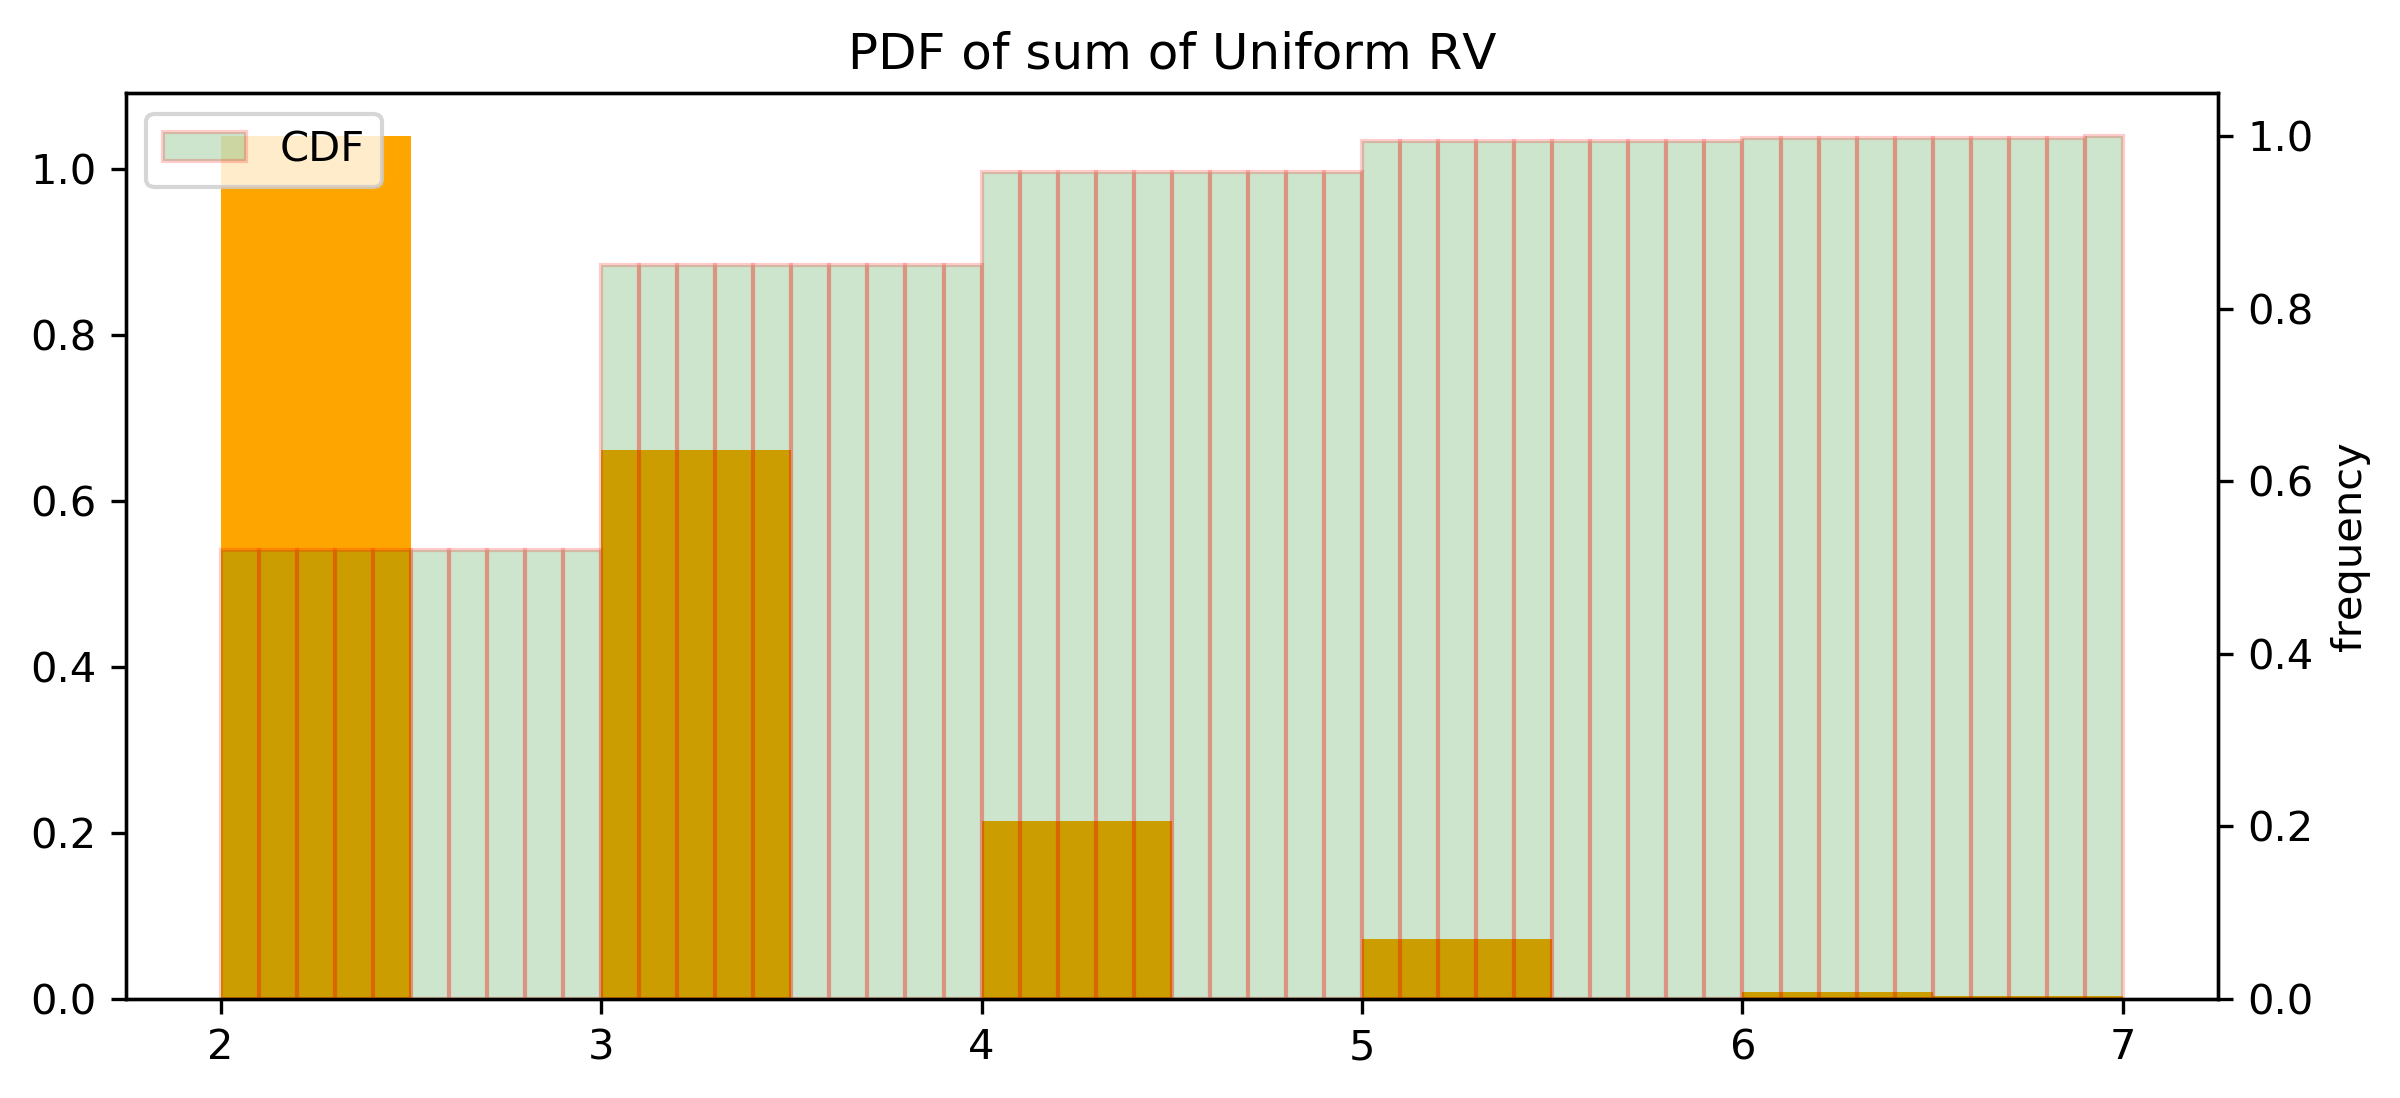

The expected value of N(point estimate) with method  sum of Uniform RV  is:  2.679
The standard deviation of N with method  sum of Uniform RV  is:  0.8578805278125853
The standard error of sampling distribution of N with method  sum of Uniform RV  is:  0.027128564281951966


In [244]:
mean,std,SE = single_trial_sum('orange','sum of Uniform RV')

* $\textbf{Result}$: The mean  and standard deviation when we take 1000 trials without creating a sampling distribution is:
    * Mean = 2.679
    * std = 0.857
    * SE = 0.0271


* $\textbf{Insights on the mean}$: As we can see from the above graph, the pdf N is close to a geometric pdf. Also as we can see the green graph represents CDF and the formula for CDF is P(N<n).

* If we look at the CDF of N above we can see that it reaches 1 for very low values of N. This makes sense because N is a random variable which consists of summation of Uniform random vars. Also the expected value of every such uniform random variable is $\frac{0+1}{2} = 0.5$. Thus it should be clear intuitively that if we draw a random value from a uniform distribution it has the highest probability of having a value 0.5 . And since 0.5 occurs more than any other value in a uniform RV between (0,1) we can say that the addition of two samples drawn from a Uniform RV would sum to 1 with the highest probability. 

* The above mentioned phenemonan is evident from the pdf in orange above in which N has the highest probability of being greater than but around 2. Thus looking at the above pdf and the fact that every random variable creating N is Uniform between (0,1) we can say that the final expected value of N would be greater than 2 but somewhere around 2.

The mean of sampling distribution for sum_of_uniform  is:  2.719176
The standard error(st_dev of sampling distribution is) of  sum_of_uniform  is: 0.02686013819770851


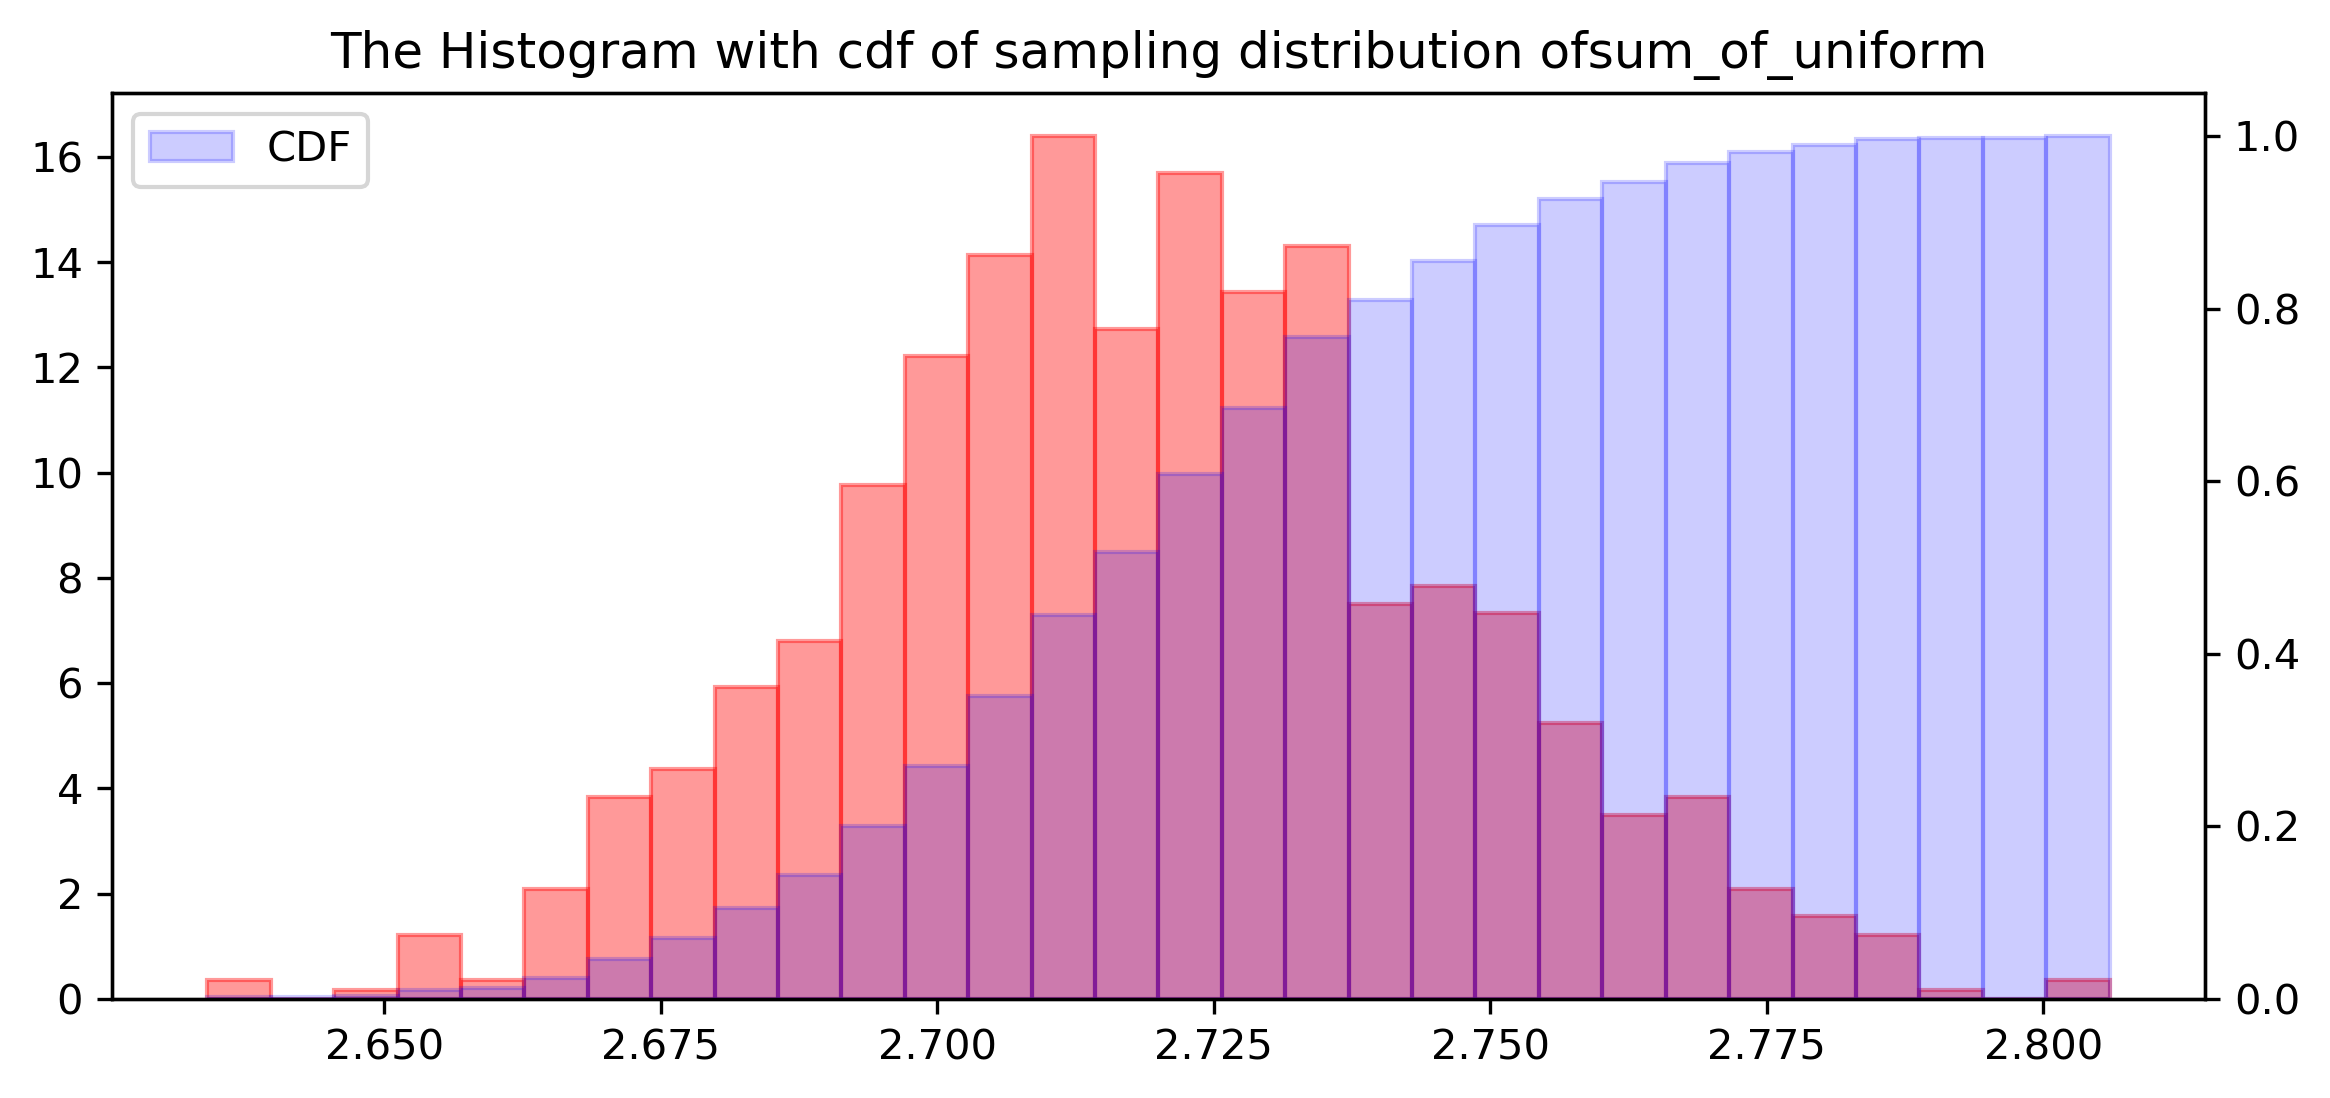

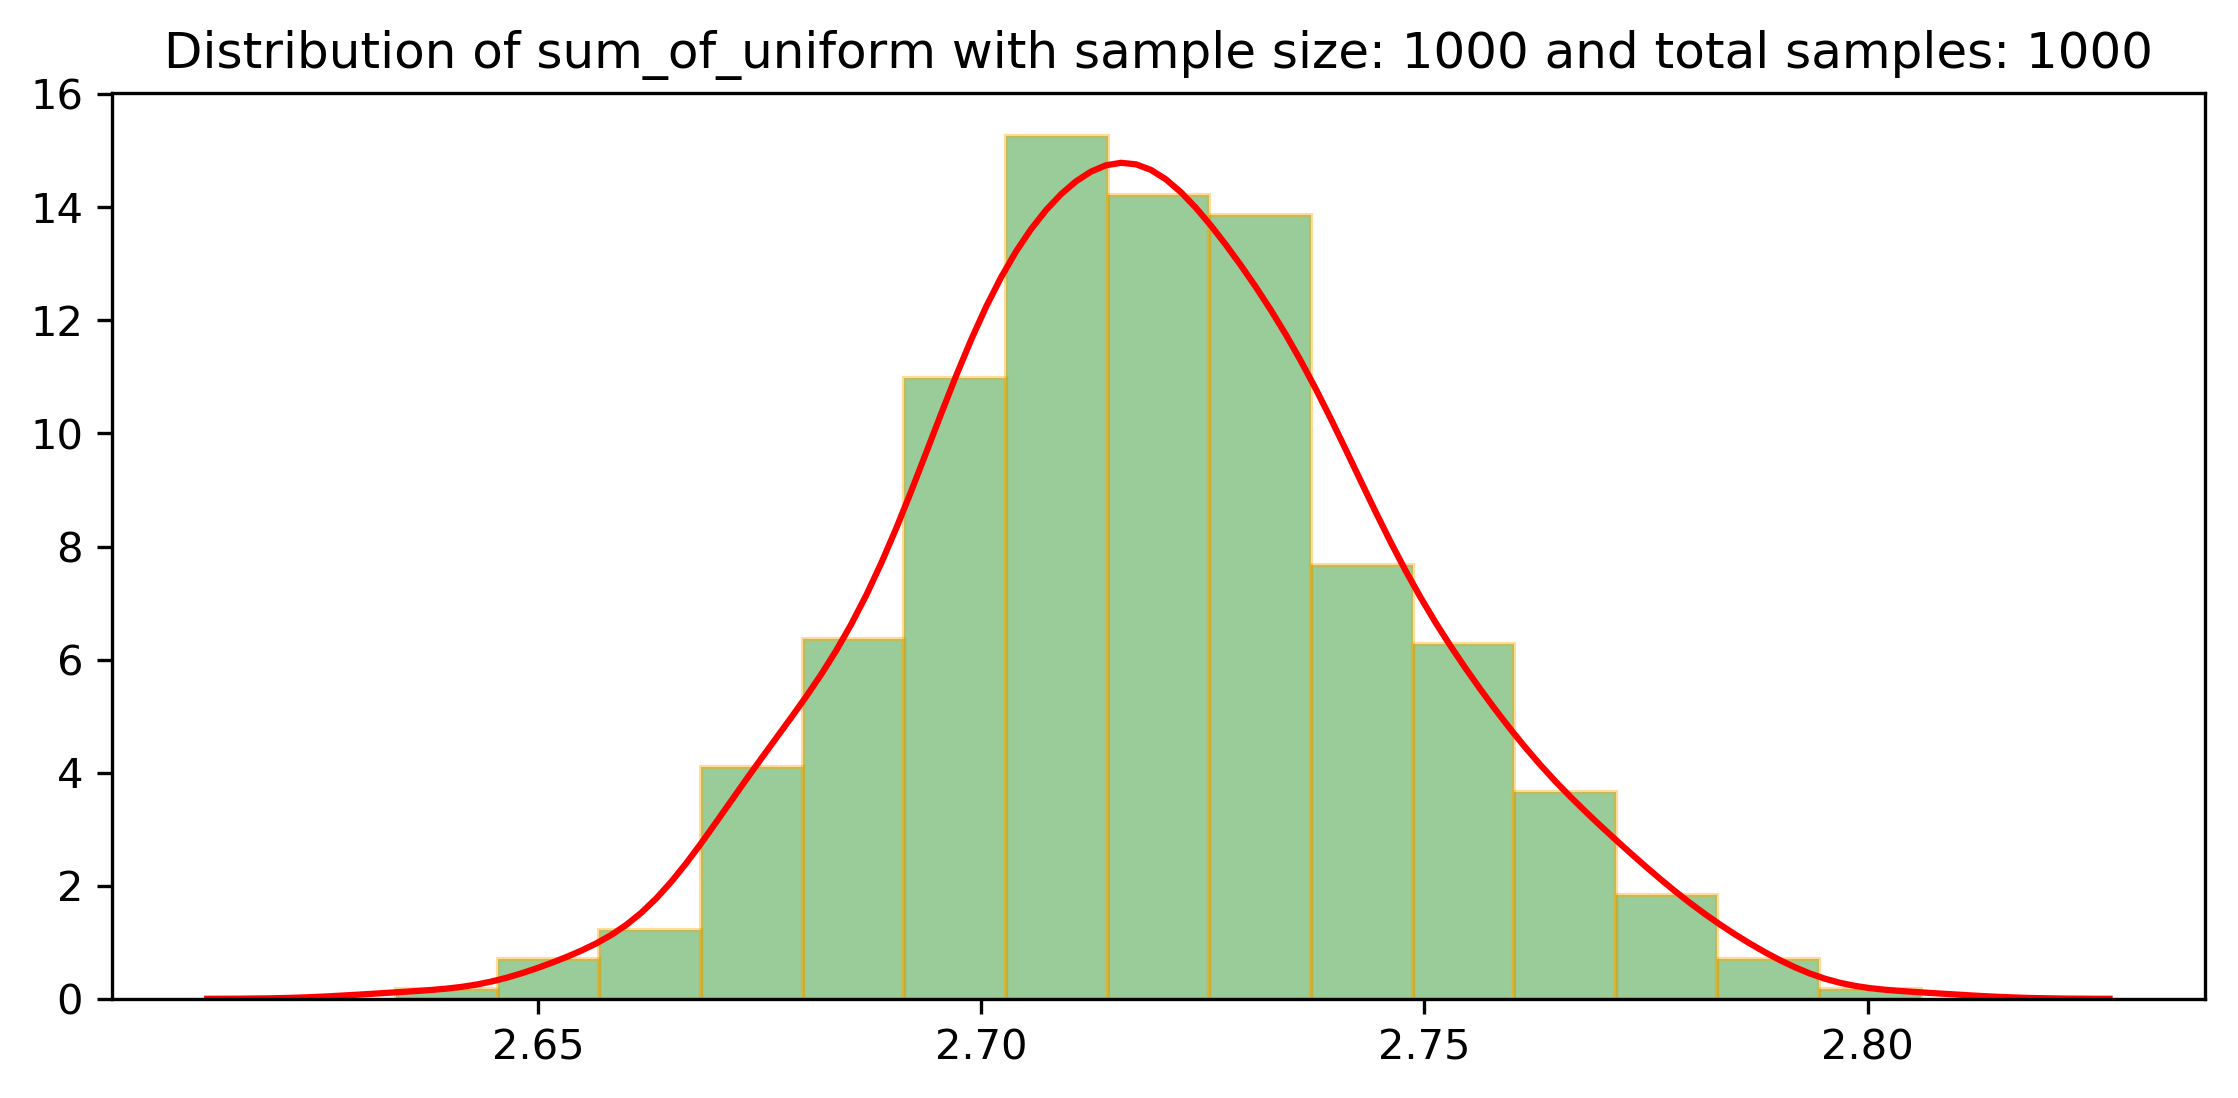

In [245]:
m = 'sum_of_uniform'
t = 1000
s = 1000
dist = generate_distribution(method=m,trials=t,sample_size=s)
d = dist


hist_and_cdf = {'hist_c' :'red','hist_e' :'red','hist_c_c' :'blue','hist_c_e' :'blue'}
density_dic = {'color':'red'}
hist_dic = {'color':'green','edgecolor':'orange','alpha':0.4}
generate_plot(method=m, dist=d, trials=t, samp_size=s, h_c = hist_and_cdf, sns_d = density_dic,sns_h = hist_dic)


* $\textbf{Insights on the simulation above}$: What we did abovewas create a sampling distribution of sample means. As we can see this distribution is nearly normal and hence we can conclude that the mean of this sample distribution would be very close to the true mean.

    * The first graph gives us a very good insight in the sampling distribution of the random variable N. It also shows the CDF of the sampling distribution. We now hat the CDF of an RV N is given by P(N <= n). This P(N > n) = 1 - P(N <= n). We can see that the CDF for values around 2.8 is almost equal to 1. 
        
        * Therefore P(N > 3) = 1 - P(N <= n) = 1 - 1 = 0
        
        * This proves the fact that we stated above in which we said that E[N] would be greater than 2 but would be around 2. Infact the mean of our sampling distribution is 2.717 which is very close to the euler number 'e' = 2.718...

* Thus before we move forward to creating the confidence interval for the sampling distribution we will try to guess what the true value of E[N] should be and why it should be around 'e' = 2.718....



* $\textbf{True E[N]}$: 
    
    * Consider we want to find P(N = 2).
        
        * In that case P(N = 2) = P($U_1$+$U_2$ > 1)
        
        * P(N = 2) = 1 - P($U_1$+$U_2$ <= 1)
        
        * In this case the probability of P($U_1$+$U_2$ <= 1) is given by the area under the line $U_1$+$U_2$ = 1.
        
        * Thus P(N = 2) = 1 - Area_under_line 
      
    * Similarly if we want to calculate P(N = 3) we do the following:
        
        * P(N = 3) = P(N <= 3) - P(N = 2)
        
        * P(N = 3) = P($U_1$+$U_2$+$U_3$ > 1) - P(N = 2)
        
        * P(N = 3) = [1 - P($U_1$+$U_2$+$U_3$ <= 1)] - P(N = 2)
        
        * In this case the probability of P($U_1$+$U_2$+$U_3$ <= 1) is the volume under the plane $U_1$+$U_2$+$U_3$ = 1
        * Thus P(N = 3) = (1 - volume_under_plane) - P(N = 2)
        
    * Thus for we can generalize it as follows:
        
        * P($U_1$+$U_2$+...+$U_n$ <= 1) = volume_under n dimensional plane
        
        * Turns out that the volume under such a plane is given by $\frac{1}{n!}$ Source: https://en.wikipedia.org/wiki/Simplex#Volume
        
    * Therefore P(N = n) = P(N <= n) - P(n <= n-1)
        
        * P(N = n) = [1 - $\frac{1}{n!}$] - [1 - $\frac{1}{(n-1)!}$] 
        
        * After simplifying P(N = n) = $\frac{n-1}{n!}$
        
    * Thus E[N] = $ \sum_{n=2}^{\infty} n*P(N=n) $
    
        * After simplifying we get E[N] = $ \sum_{n=2}^{\infty} \frac{1}{n!} $
        
        * Since we are considering 'e' the Taylor series expansion is given by $e^x$ = $ \sum_{n=0}^{\infty} \frac{x^n}{n!} $ Source: https://en.wikipedia.org/wiki/Taylor_series
        
        * Thus if x = 1 then we get $e^1$ = $ \sum_{n=0}^{\infty} \frac{1^n}{n!} $ 
        
        * Thus $e$ = $ \sum_{n=0}^{\infty} \frac{1}{n!} $ = E[N]
        
        * Thus E[N] = e = 2.718...
        


* Now we will plot the 95% confidence interval which states that we are 95 percent confident of capturing the true mean which is 'e' within the given range.

The mean of sampling distribution for sum_of_uniform  is:  2.679
The standard error(st_dev of sampling distribution is) of  sum_of_uniform  is: 0.027128564281951966
The lower value of 95% confidence level of  sum_of_uniform  is 2.6258280140073738
The upper value of 95% confidence level of  sum_of_uniform  is 2.732171985992626


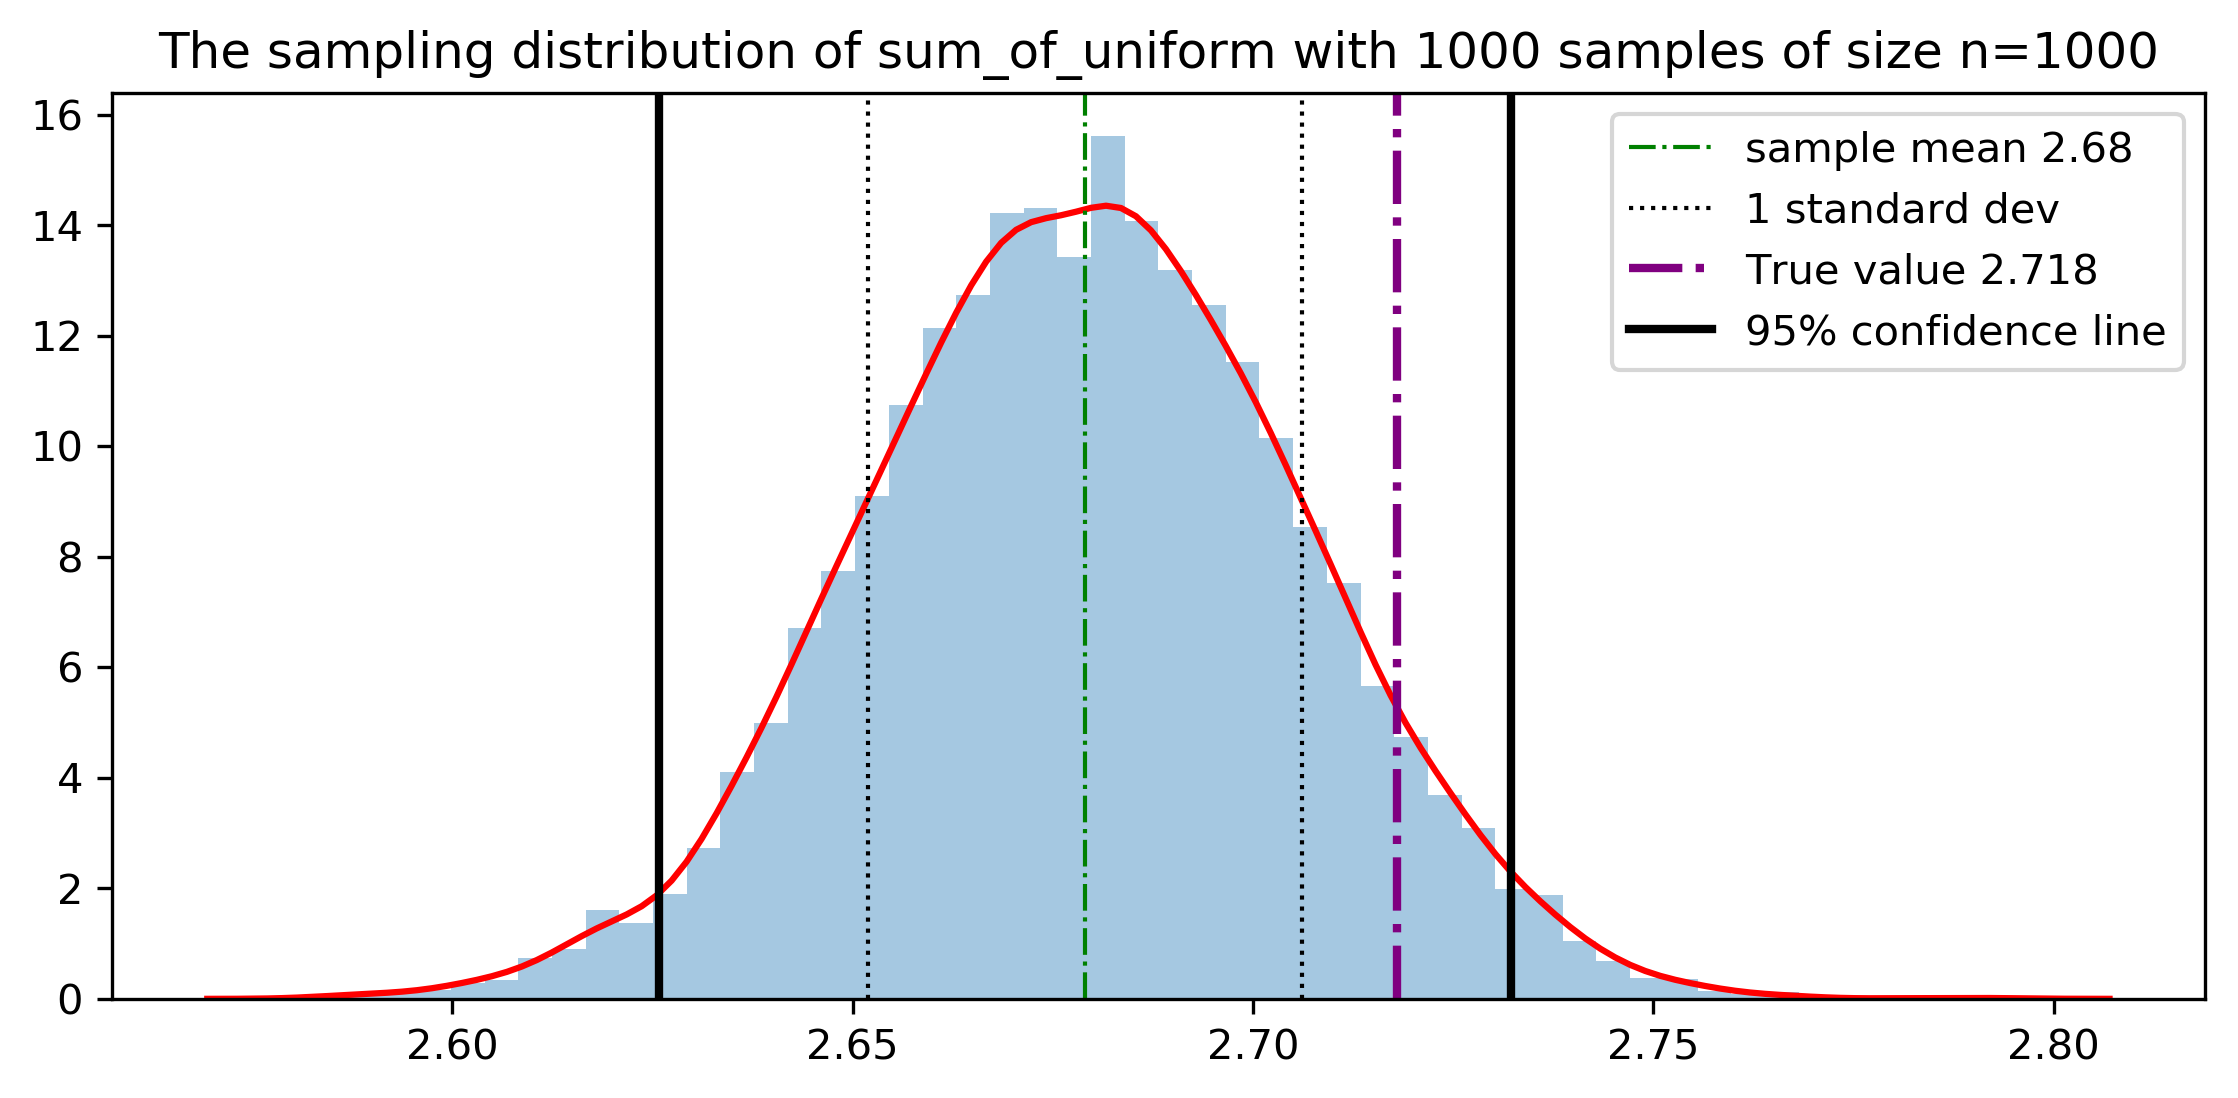

In [247]:
np.random.seed(4)
dist = np.random.normal(loc=mean,scale=SE,size = 10000)
plot_densityCurve(dist,density_dic,None,t,s,mean,SE,2.718,m)

* $\textbf{Result}$: The confidence interval range of our experiment

|True Value('e')|     point_estimate     | lower_bound         |  upper_bound         |
| :--------------:  | :--------------:  | :-----------------: | :-----------------: |
|      2.718        |      2.679        |     2.626            |     2.732               |

* Thus we can say that we are 95% confident that the true mean(E[N] = 'e') will be within the upper and lower bounds generated by our simulation.

* We can see from the above figure that the True mean is captured by the confidence interval.



##  2.)  N = Min{n: $U_1$ <= $U_2$ <=....$U_{n-1}$ > $U_n$}. i.e. the nth term is the first that is less than its predecessor, where {Ui} are independent identically distributed (iid) Uniform(0,1) RV’s. Find (by simulation): E[ N ] an estimator for the mean.

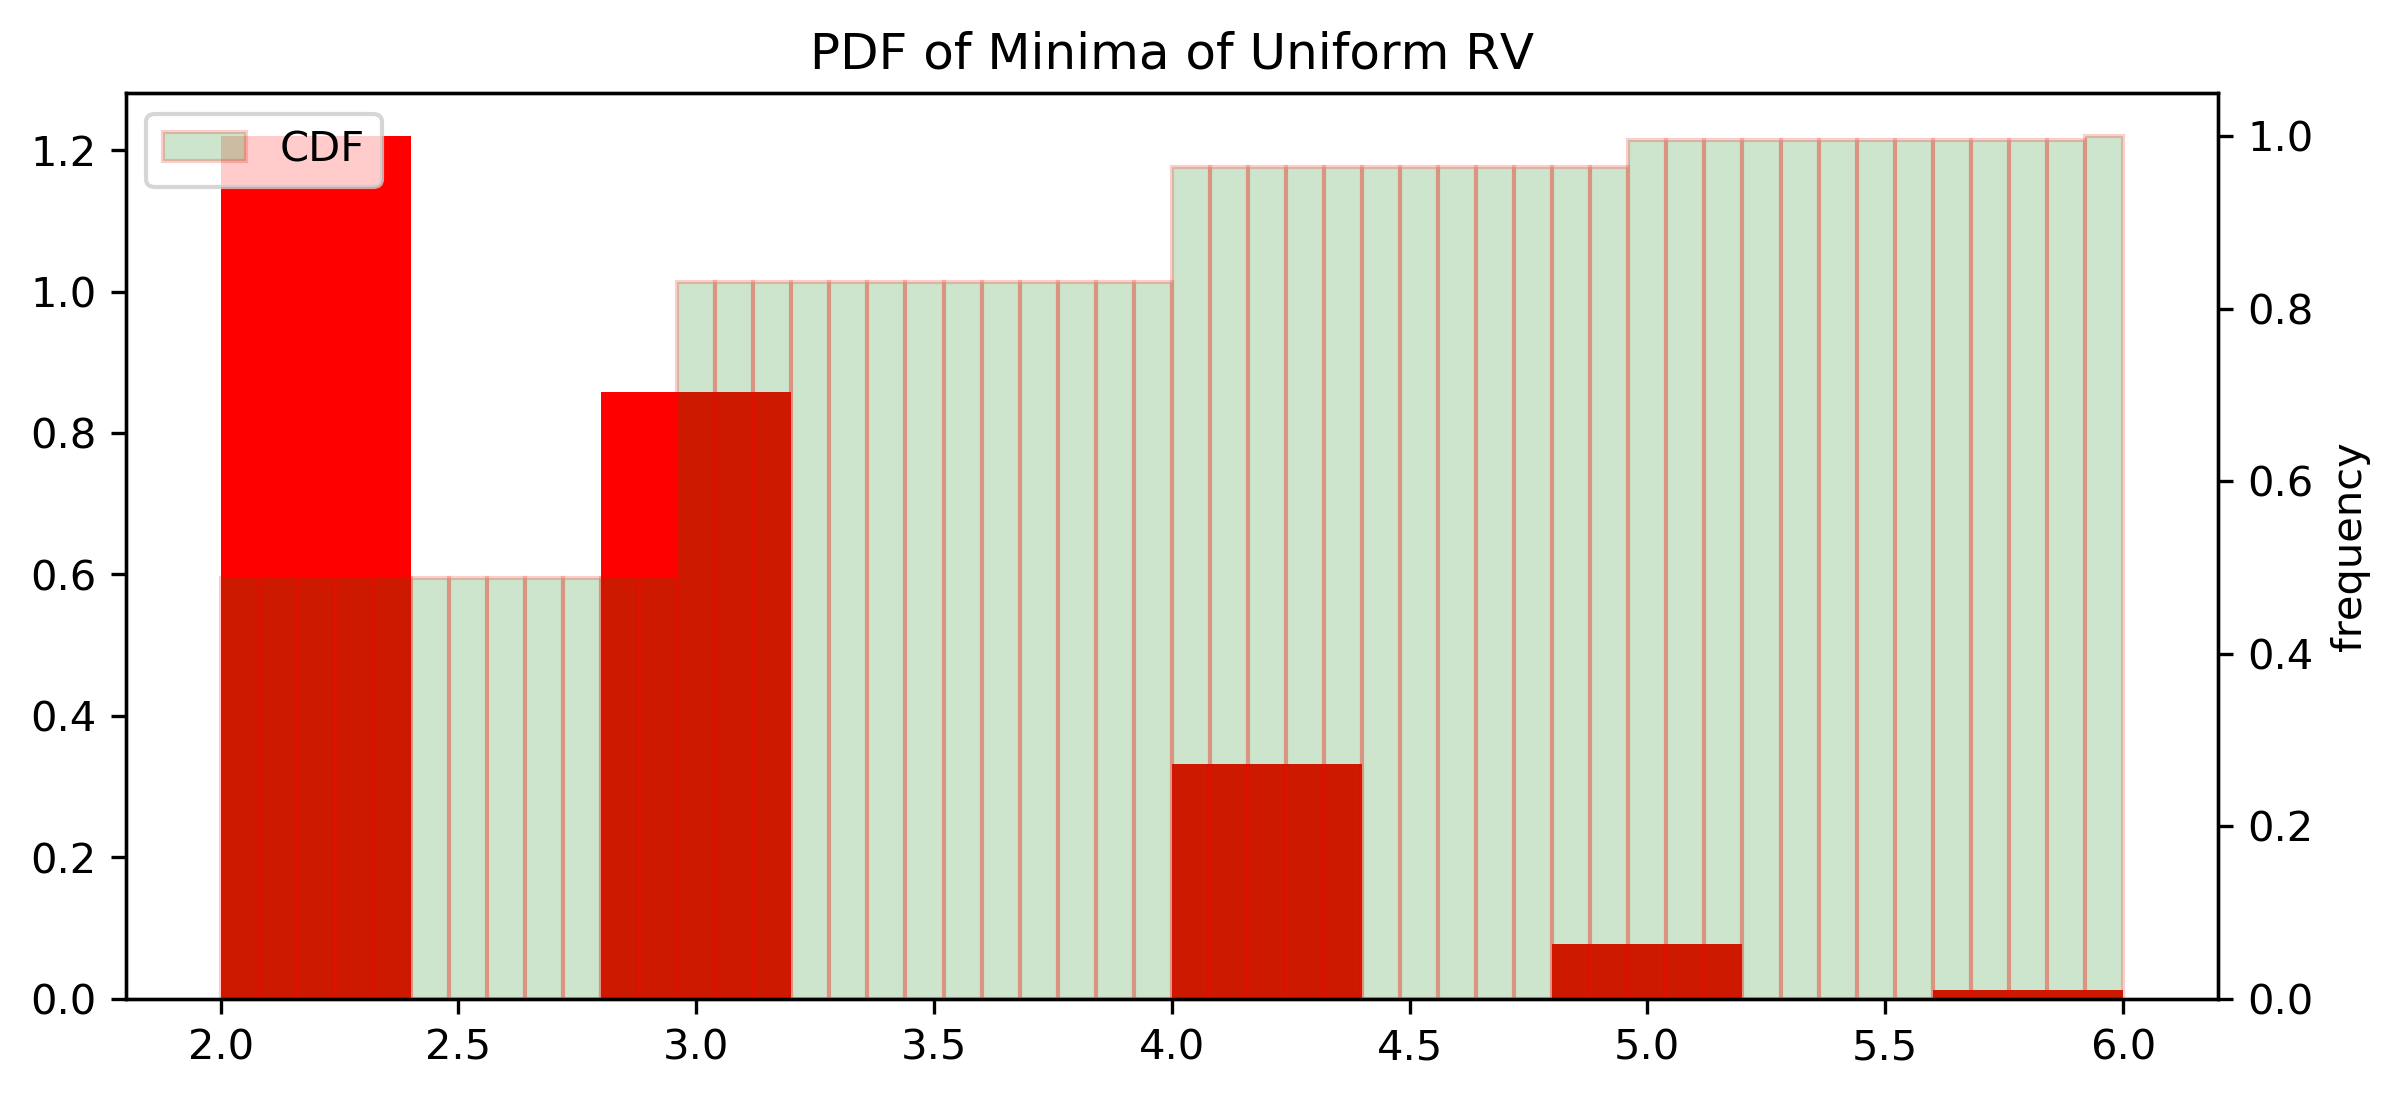

The expected value of N(point estimate) with method  Minima of Uniform RV  is:  2.722
The standard deviation of N with method  Minima of Uniform RV  is:  0.8442250884687093
The standard error of sampling distribution of N with method  Minima of Uniform RV  is:  0.02669674137418273


In [248]:
mean1,std1,SE1 = single_trial_minima('red','Minima of Uniform RV')

* $\textbf{Result}$: The mean  and standard deviation when we take 1000 trials without creating a sampling distribution(i.e a point estimate) is:
    * Mean = 2.72
    * std = 0.844
    * SE = 0.026

* $\textbf{Insights on the mean}$: Even the pdf of this variable turns out to be a geometric pdf. This makes sense as geometric pdf captures P(N = n) where n is the value when the first success occurs. In this case the success being when $U_{i-1} > U_i$.

* We can also see that the mean of this distribution is close to the value of 'e' as mentioned above. Thus we again will try to see if E[N] = 'e'.

* Before we go deep into finding the true value of E[N] we would first see some graphs of the sampling distribution which would help us to give a final conclusion on the value of E[N].

* The rest of the insights are same as mentioned in part 1 above.

The mean of sampling distribution for minima_of_uniform  is:  2.7177249999999997
The standard error(st_dev of sampling distribution is) of  minima_of_uniform  is: 0.027674417338039842


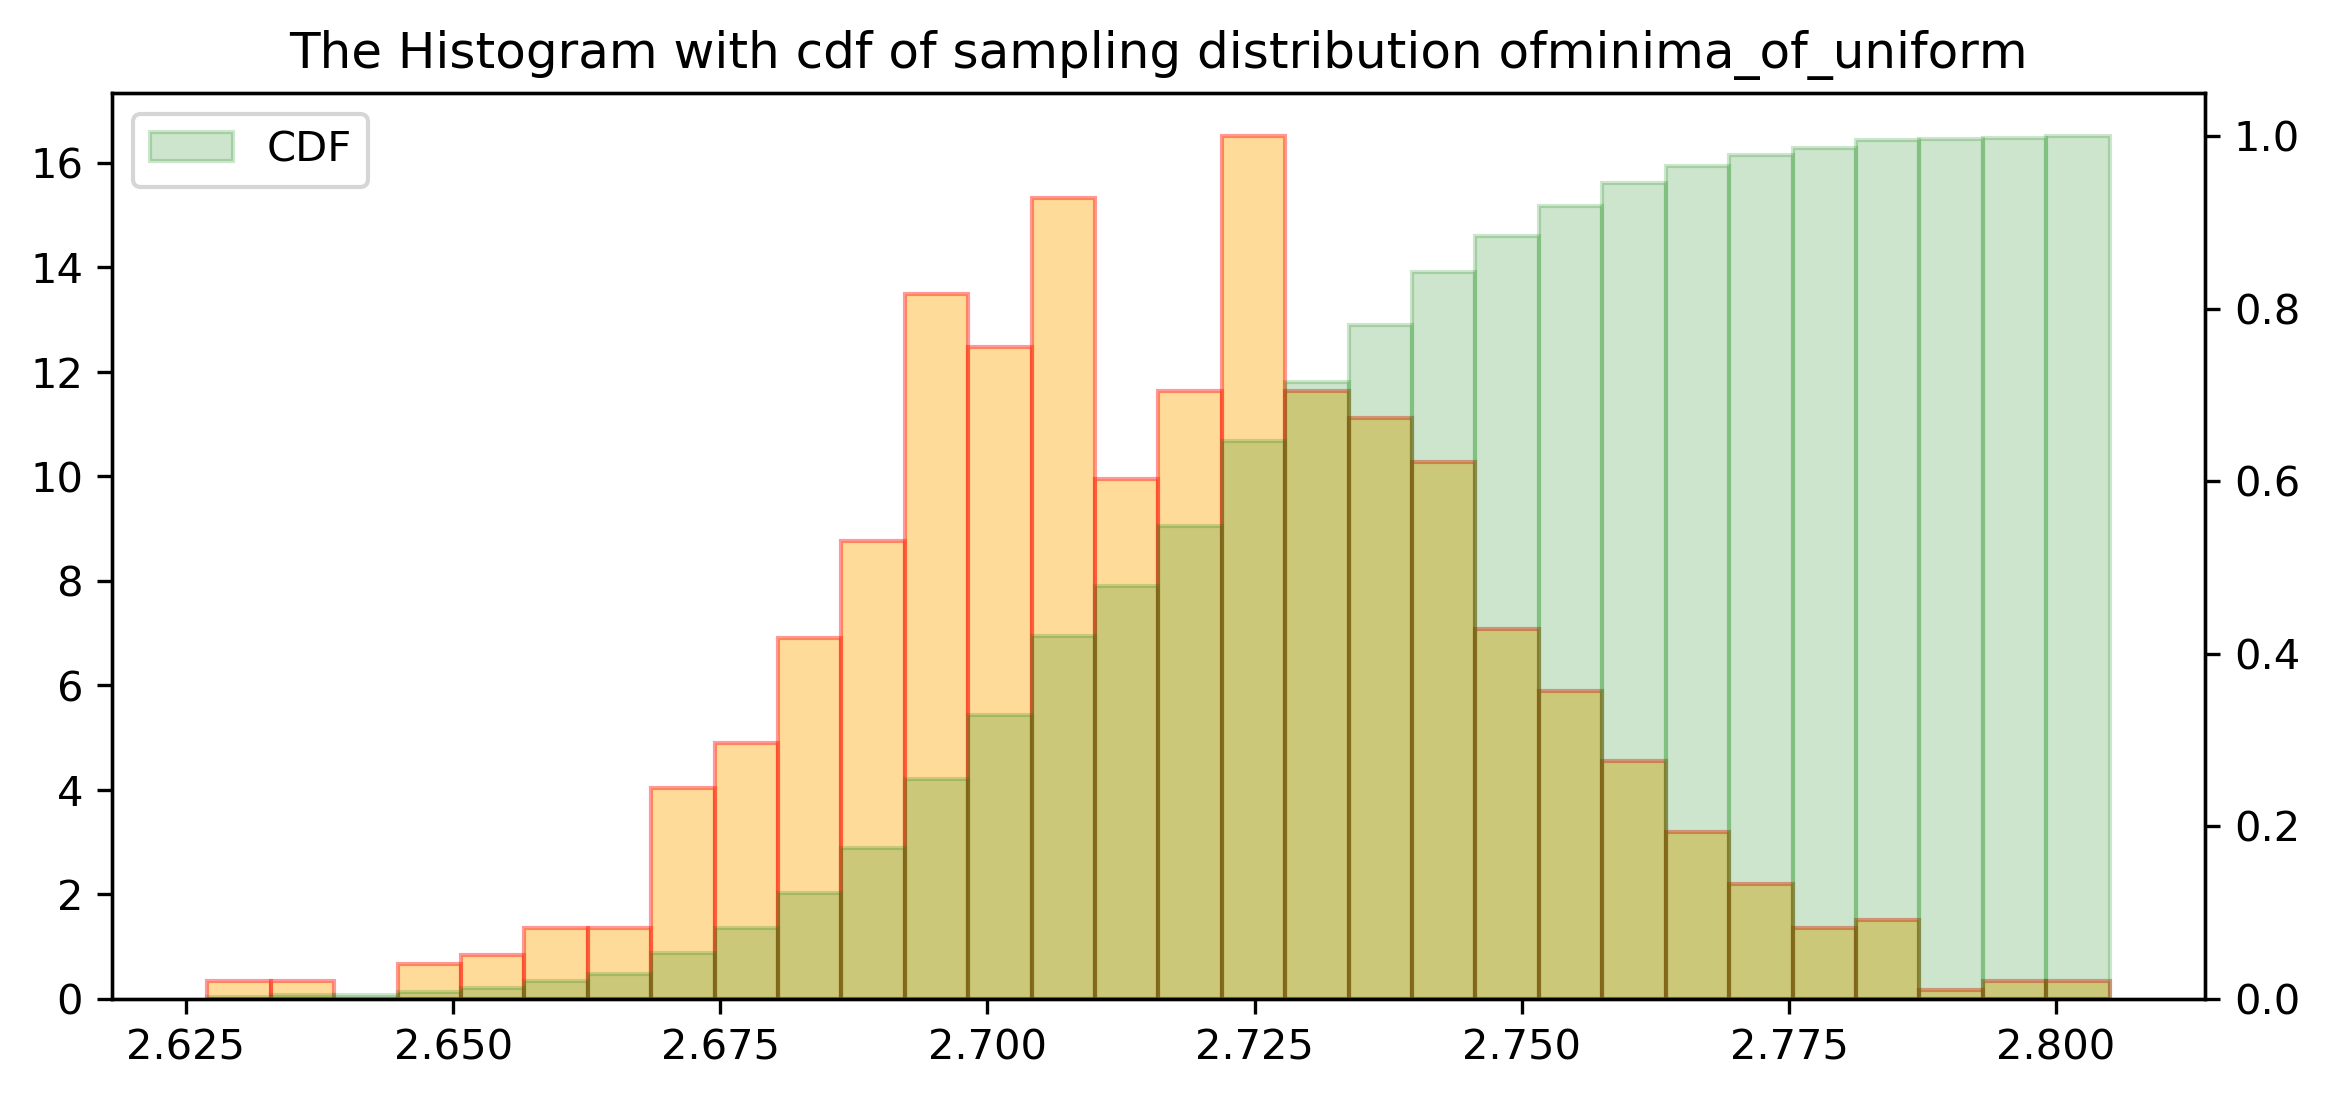

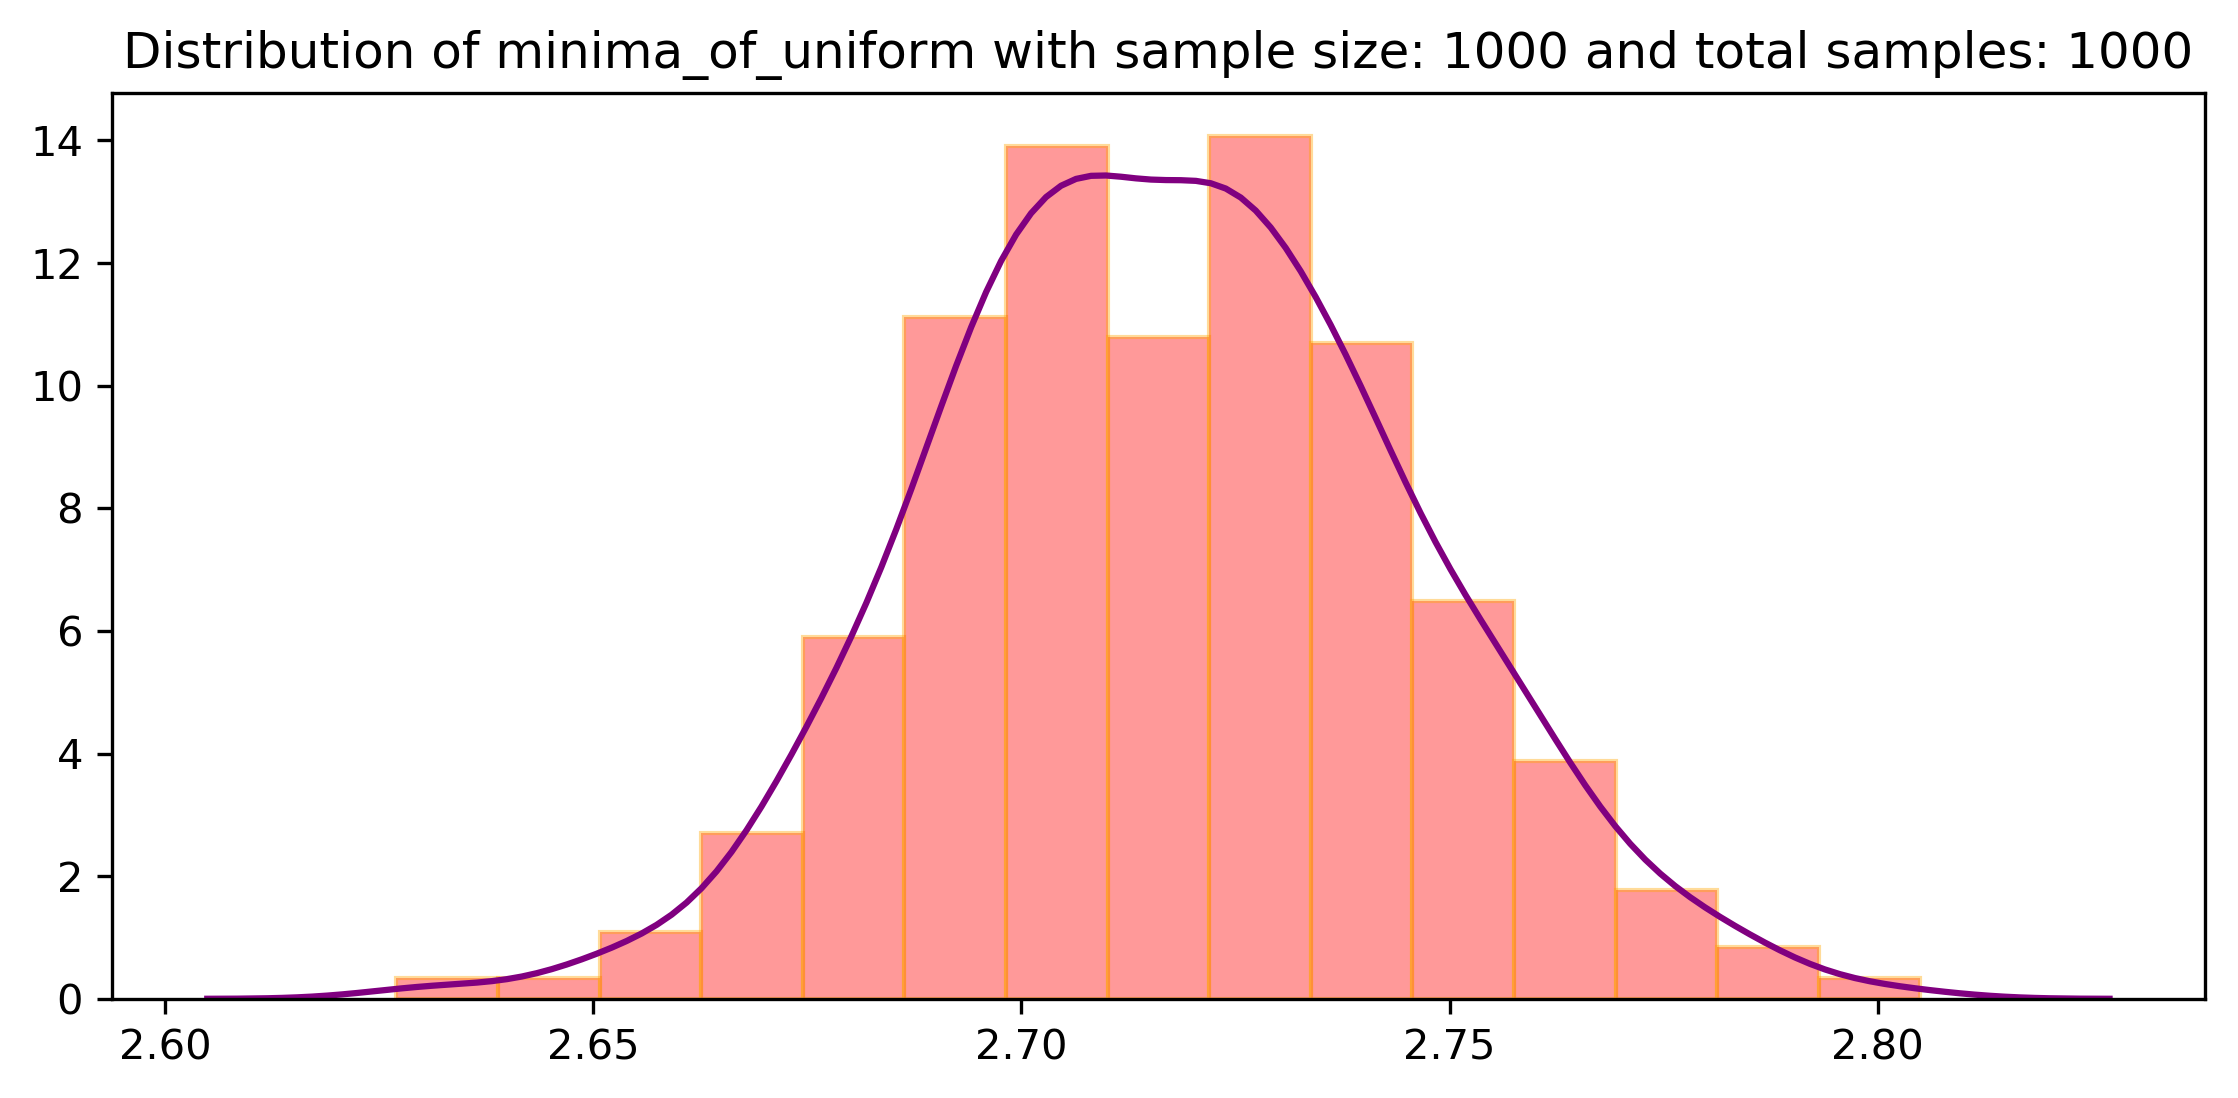

In [249]:
m = 'minima_of_uniform'
t = 1000
s = 1000
dist = generate_distribution(method=m,trials=t,sample_size=s)

d = dist


hist_and_cdf = {'hist_c' :'orange','hist_e' :'red','hist_c_c' :'green','hist_c_e' :'green'}
density_dic = {'color':'purple'}
hist_dic = {'color':'red','edgecolor':'orange','alpha':0.4}
generate_plot(method=m, dist=d, trials=t, samp_size=s, h_c = hist_and_cdf, sns_d = density_dic,sns_h = hist_dic)

density_dic = {'color':'blue'}
hist_dic = {'color':'orange','alpha':0.5}

* $\textbf{Insights on the simulation above}$: What we did above was create a sampling distribution of sample means. As we can see this distribution is nearly normal and hence we can conclude that the mean of this sample distribution would be very close to the true mean.

* The rest of the insights of above simulation are same as part one. The only thing I would like to add here is that since the distribution for random variable N which denotes the Minima of RV is almost the same as that from part 1, the true mean of this RV should also be equal to 'e'. Let us try to prove this expected Value of N 

* $\textbf{True E[N]}$: 
    
    * P(N = 2) = P($U_1$ > $U_2$)
    
        * But P($U_1$ > $U_2$) + P($U_2$ > $U_2$) + P($U_1$ = $U_2$) = 1
        
        * We also know that since U is a continuous uniform random variable P($U_1$ = $U_2$) = 0
        
        * Therefore P($U_1$ > $U_2$) + P($U_2$ > $U_2$) = 1
        
        * But since $U_1$ and $U_2$ are i.i.d we can say that P($U_1$ > $U_2$) = P($U_2$ > $U_1$).
        
        * Thus P($U_1$ > $U_2$) = $\frac{1}{2}$ = $\frac{1}{2!}$
        
     * Similarly P(N = 3) =  P(N <= 3) - P(N = 2) 
     
         * But P(N <= 3) = P({$U_1$ <= $U_2$} > $U_3$) = 1 -  P({$U_1$ <= $U_2$} <= $U_3$)
         
         * Therefore P(N <= 3) = 1 -  P($U_1$ <= $U_2$ <= $U_3$)
         
         * Again we can say that:
             
             *  P($U_1$ < $U_2$ < $U_3$) + P($U_1$ < $U_3$ < $U_2$) + P($U_3$ < $U_1$ < $U_2$) + P($U_3$ < $U_2$ < $U_1$) + P($U_2$ < $U_3$ < $U_1$) + P($U_2$ < $U_1$ < $U_3$) = 1
             
         * As we said above all the probabilities are equal and hence P($U_1$ <= $U_2$ <= $U_3$) = $\frac{1}{6}$ = $\frac{1}{3!}$.
         
         * Thus P(N = 3) = (1 - $\frac{1}{3!}$) - P(N = 2)
         
     * If we generalize the above method P(N = n) would be given by :
     
         * P(N = n) = [1 - $\frac{1}{n!}$] - [1 - $\frac{1}{(n-1)!}$] 
        
         * After simplifying P(N = n) = $\frac{n-1}{n!}$
        
     * Thus E[N] = $ \sum_{n=2}^{\infty} n*P(N=n) $
    
        * After simplifying we get E[N] = $ \sum_{n=2}^{\infty} \frac{1}{n!} $
        
        * Since we are considering 'e' the Taylor series expansion is given by $e^x$ = $ \sum_{n=0}^{\infty} \frac{x^n}{n!} $ Source: https://en.wikipedia.org/wiki/Taylor_series
        
        * Thus if x = 1 then we get $e^1$ = $ \sum_{n=0}^{\infty} \frac{1^n}{n!} $ 
        
        * Thus $e$ = $ \sum_{n=0}^{\infty} \frac{1}{n!} $ = E[N]
        
        * Thus E[N] = e = 2.718...
     

* The 95% confidence interval would be as follows:

The mean of sampling distribution for minima_of_uniform  is:  2.722
The standard error(st_dev of sampling distribution is) of  minima_of_uniform  is: 0.02669674137418273
The lower value of 95% confidence level of  minima_of_uniform  is 2.669674386906602
The upper value of 95% confidence level of  minima_of_uniform  is 2.774325613093398


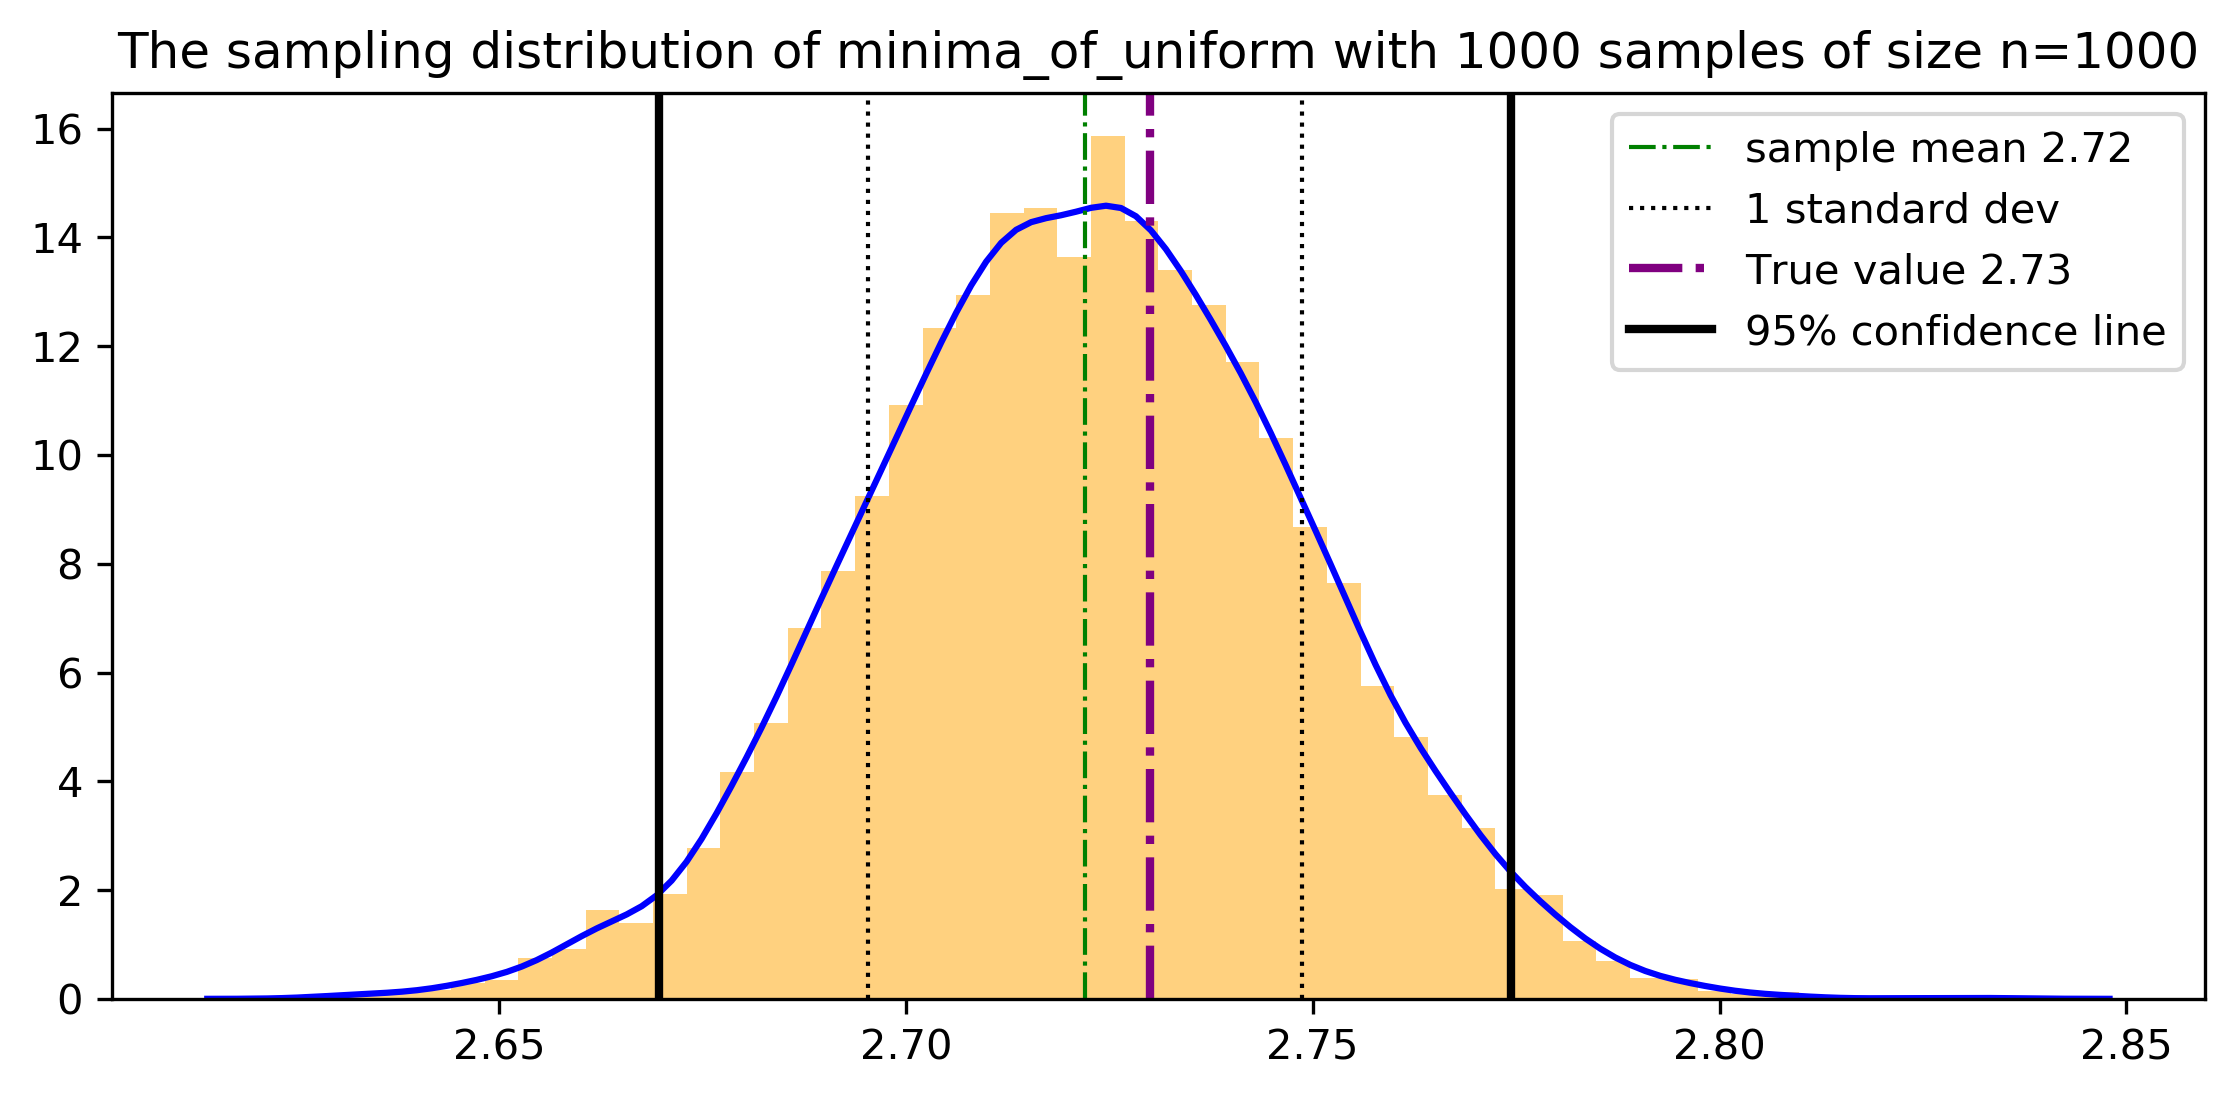

In [250]:
np.random.seed(4)
dist = np.random.normal(loc=mean1,scale=SE1,size = 10000)
hist_dic = {'color':'orange','alpha':0.5}
plot_densityCurve(dist,density_dic,hist_dic,t,s,mean1,SE1,2.73,m)

* $\textbf{Result}$: The 95% confidence interval range of the sampling distribution of an RV that captures Minima of uniform RV's.

|True Value('e')|     point_estimate     | lower_bound         |  upper_bound         |
| :--------------:  | :--------------:  | :-----------------: | :-----------------: |
|      2.718        |      2.72        |    2.669            |     2.774               |

* Thus we can say that we are 95% confident that the true mean(E[N] = 'e') will be within the upper and lower bounds generated by our simulation.

* We can see from the above figure that the True mean is captured by the confidence interval.

## 3.) $\textbf{Maxima of Uniform RV's}$: $U_j$ > $max_{i=1:j-1}$  {$U_i$}.

Sample Mean of X_2 is: 2.917525773195876
Sample mean of X_3 is: 5.771739130434782


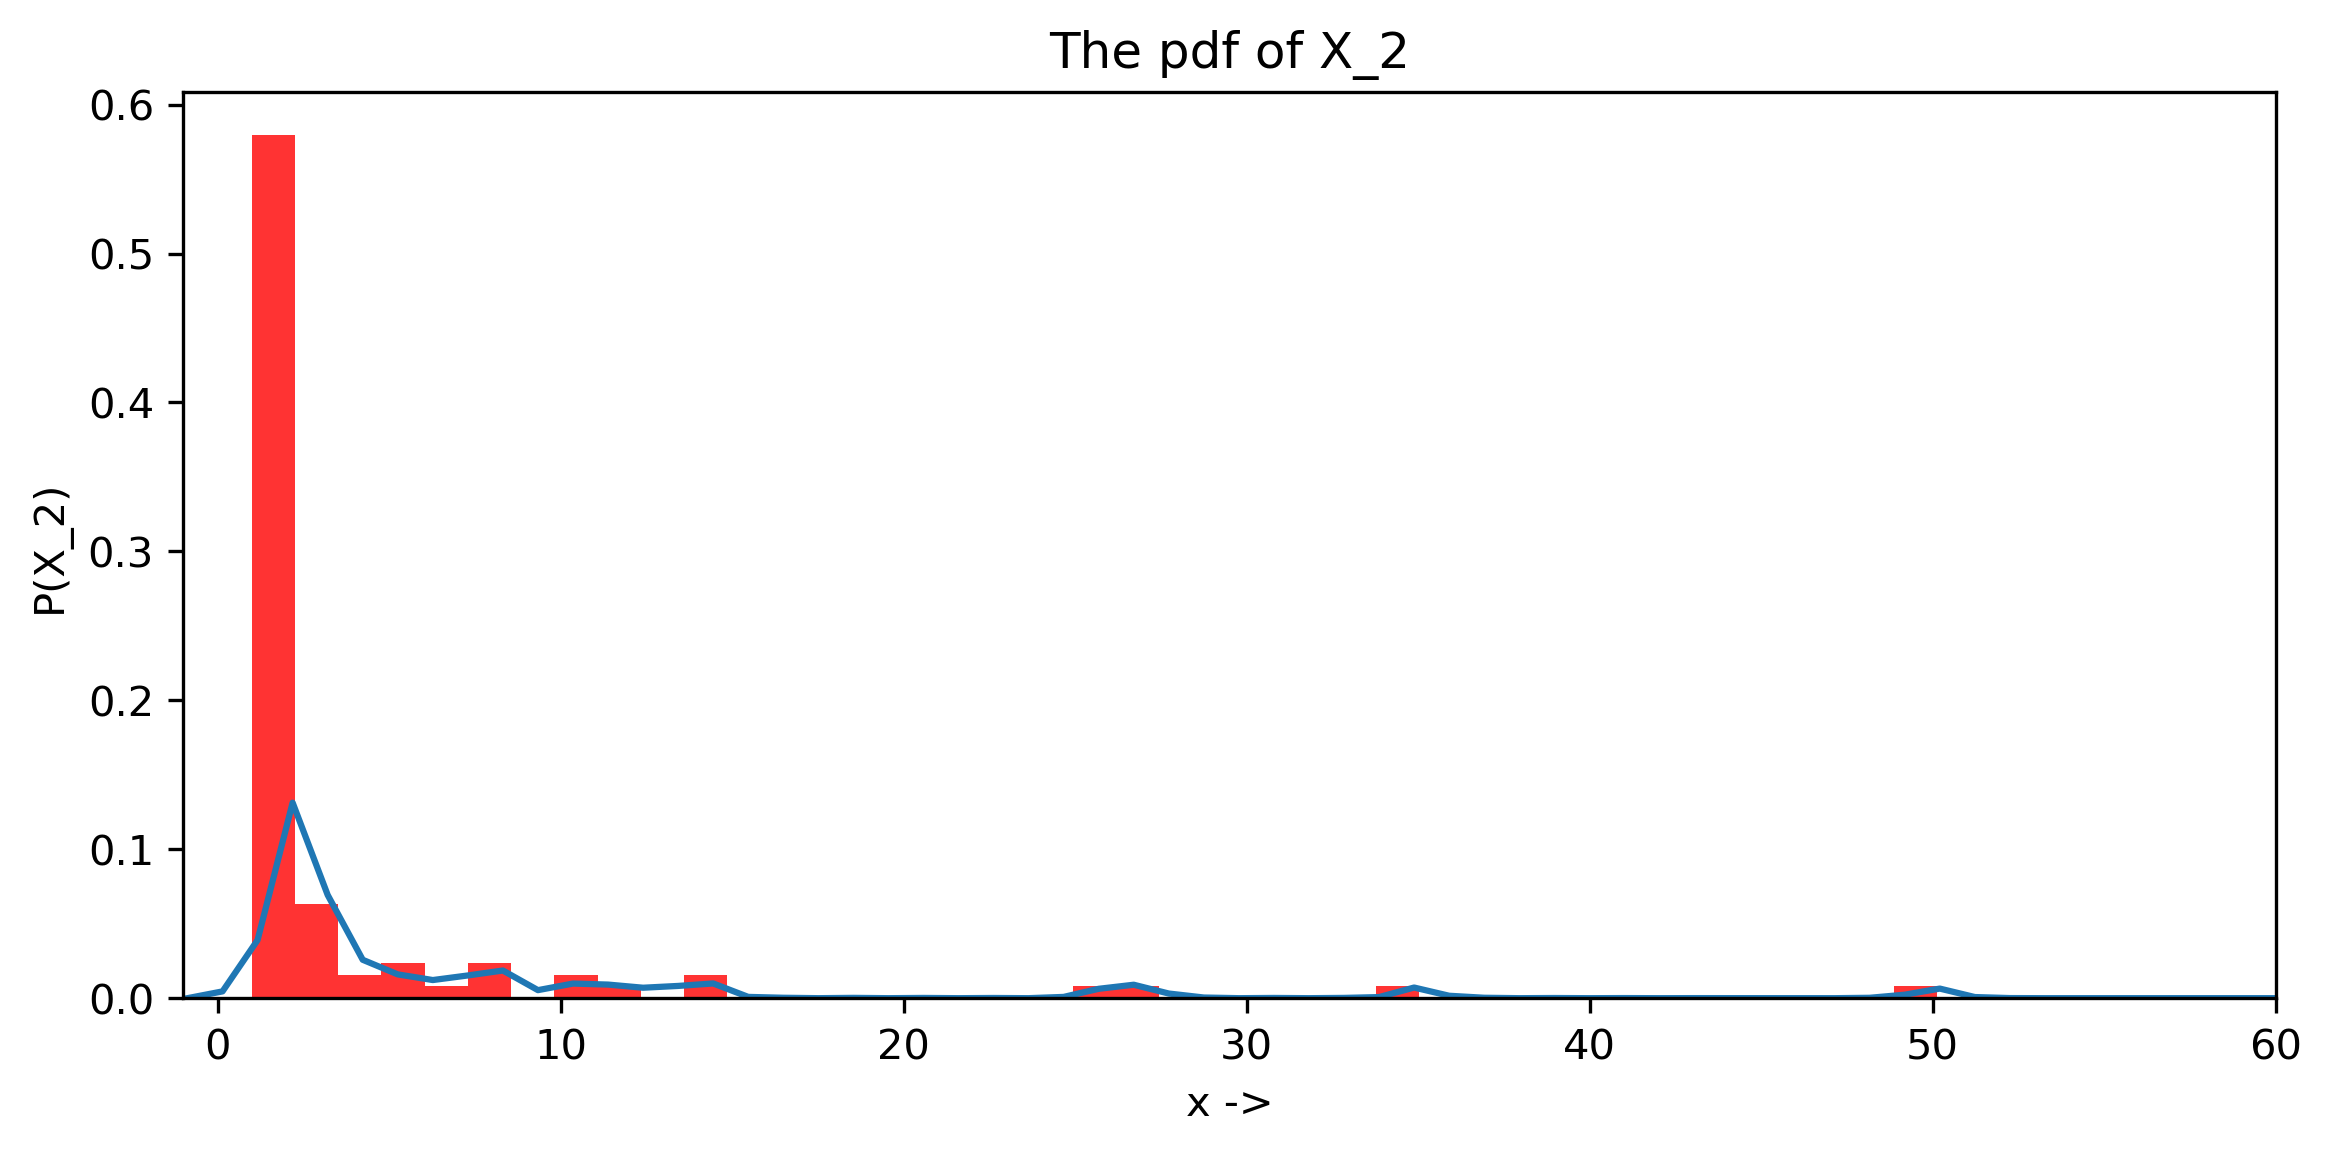

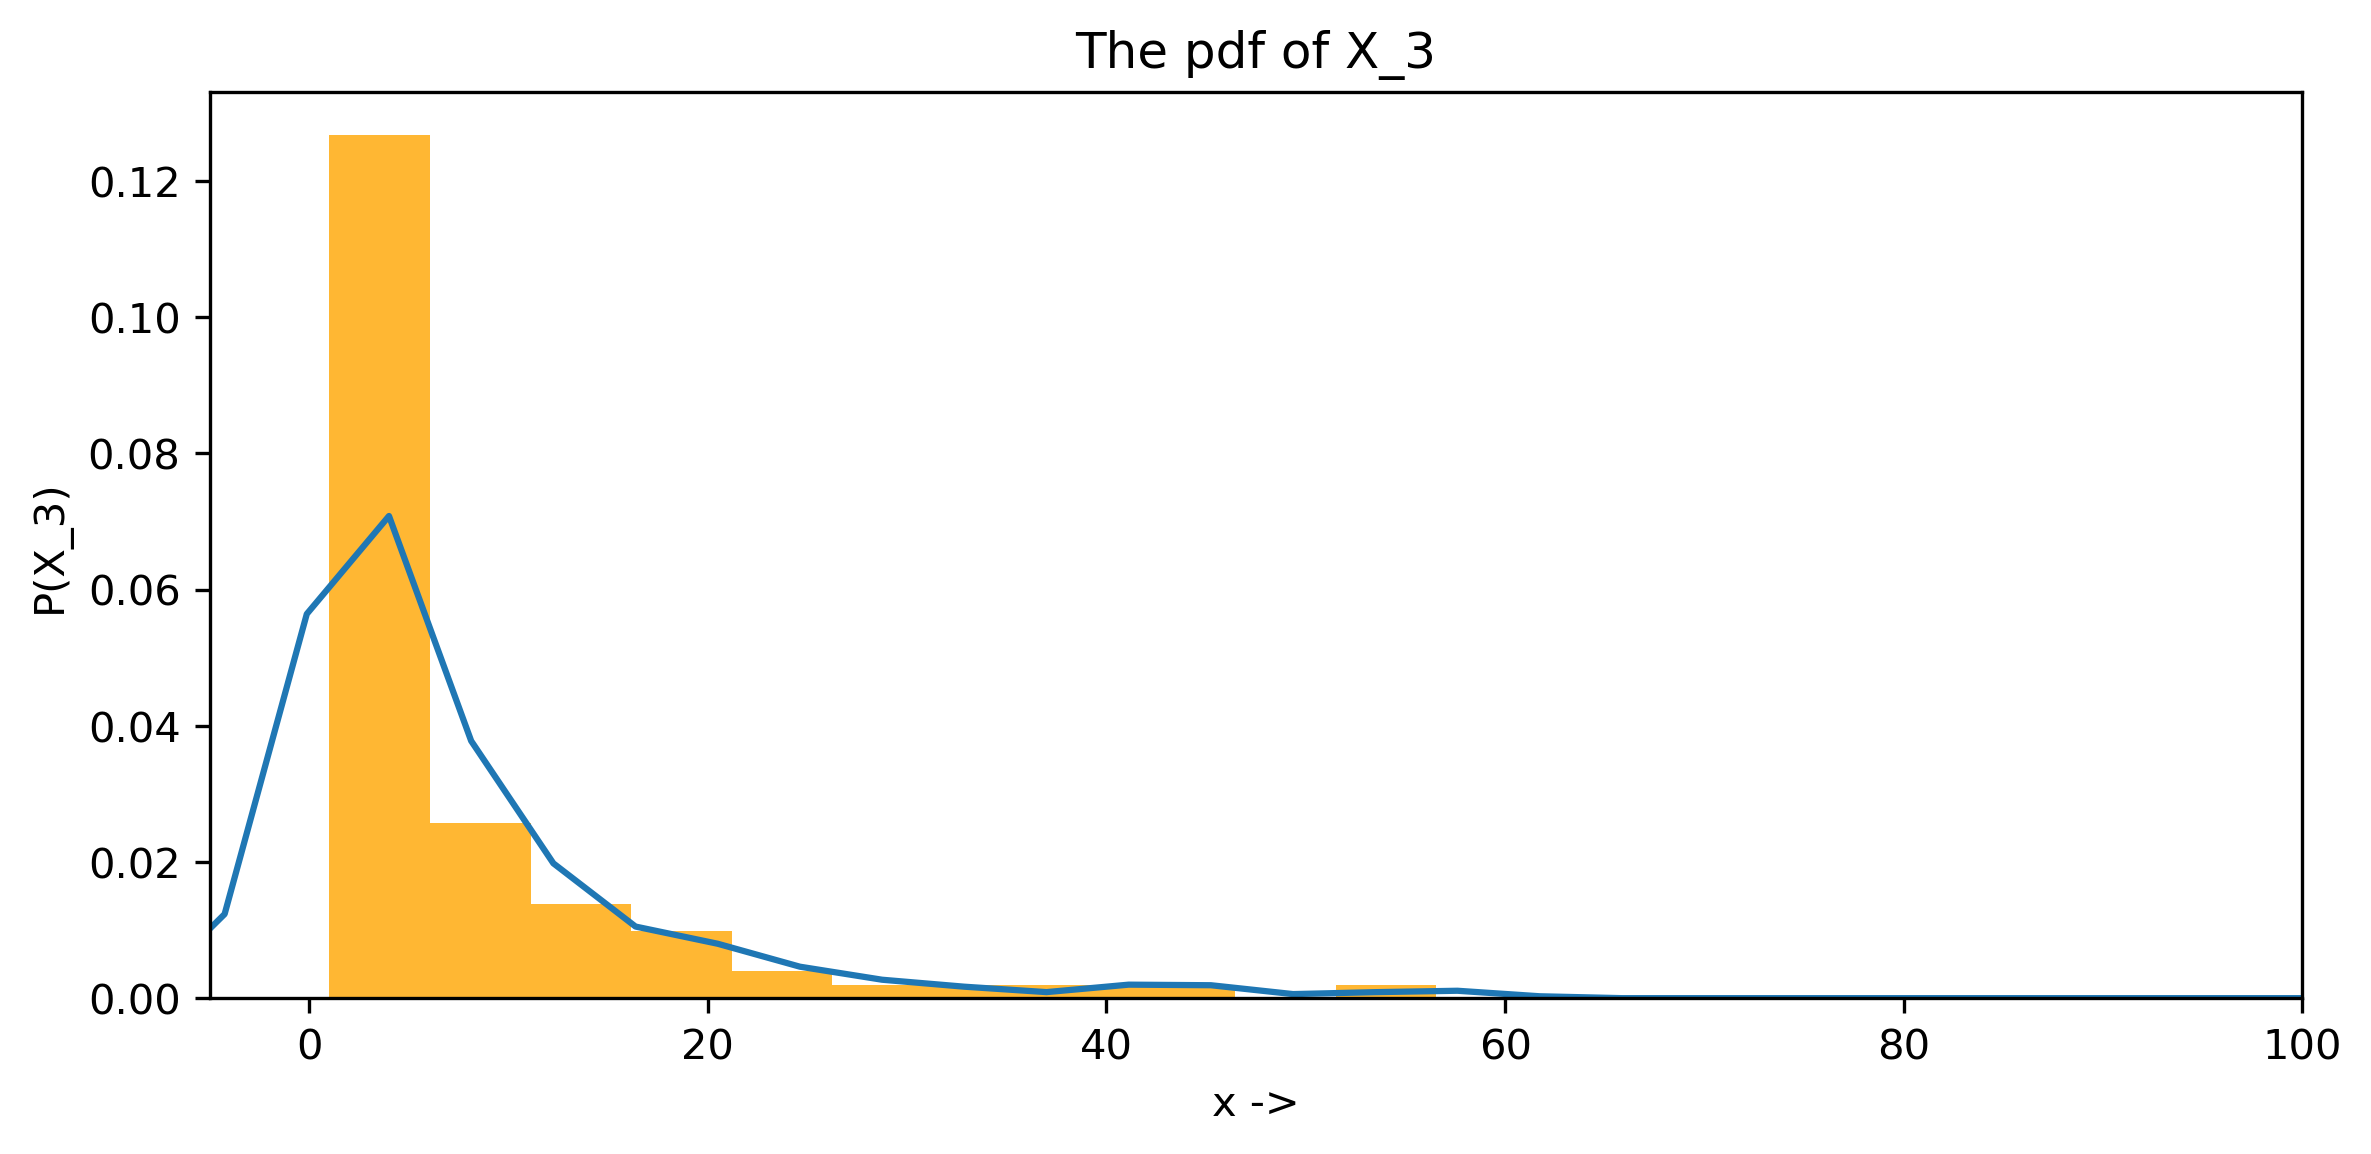

In [254]:
maxima_of_uniform(100)


* As we can see above the PDF of Maxima of a uniform random variable again follows a geometric pdf. This is because $X_1$, $X_2$, $X_3$ etc represent the random variables which depict the $j^{th}$ record. In other words they represent the $j^{th}$ success. And the geometric pdf maps the same thing which is the first success after k trials.

* $\textbf{Result}$: The sample means when the sample size is 100 are as follows:

|sample mean($X_2$)|sample mean($X_3$)     |
| :--------------:  | :--------------:  | 
|      2.917        |      5.772        |   


* $\textbf{Analytical expression for P( $X_2$ = k)}$: 
    
    * P($X_2$ = 1) = P($U_1$ < $U_2$)
        
        * But P($U_1$ > $U_2$) + P($U_2$ > $U_2$) + P($U_1$ = $U_2$) = 1
        
        * We also know that since U is a continuous uniform random variable P($U_1$ = $U_2$) = 0
        
        * Therefore P($U_1$ > $U_2$) + P($U_2$ > $U_2$) = 1
        
        * But since $U_1$ and $U_2$ are i.i.d we can say that P($U_1$ > $U_2$) = P($U_2$ > $U_1$).
        
        * Thus P($U_1$ > $U_2$) = $\frac{1}{2}$ = $\frac{1}{2^1}$
        
     * P($X_2$ = 2) = P({$U_1$ and $U_2$} < $U_3$)
     
        * Thus P($X_2$ = 2) = P({$U_1$ < $U_3$} and {$U_2$ < $U_3$})
        
        * Since the events are i.i.d P($X_2$ = 2) = P($U_1$ < $U_3$) x P($U_2$ < $U_3$)
        
        * Therefore as explained above all the probabilities have value $\frac{1}{2}$. And P($X_2$ = 2) = $\frac{1}{2}$ x $\frac{1}{2}$ = $\frac{1}{2^2}$
          
     * Similarly P($X_2$ = 3) = P({$U_1$ and $U_2$ and $U_3$} < $U_4$)
         
        * Thus P($X_2$ = 3) = P({$U_1$ < $U_4$} and {$U_2$ < $U_4$} and {$U_3$ < $U_4$})
        
        * P($X_2$ = 3) = P($U_1$ < $U_4$) x P($U_2$ < $U_4$) x P($U_3$ < $U_4$)
        
        * Thus P($X_2$ = 3) = $\frac{1}{2}$ x $\frac{1}{2}$ x $\frac{1}{2}$ = $\frac{1}{2^3}$
        
     * Thus we now have the following probabilities:
     
         * P($X_2$ = 1) = $\frac{1}{2^1}$
         
         * P($X_2$ = 2) = $\frac{1}{2^2}$
         
         * P($X_2$ = 3) = $\frac{1}{2^3}$
         
         * Thus considering this trend we can say that:
         
             * P($X_2$ = k) = $\frac{1}{2^k}$
         
        

* $\textbf{Expected value of $X_2$}$:

    * The expected value is given by E[$X_2$] = $ \sum_{k=1}^{\infty} k*(X_2=k) $
    
        * Thus E[$X_2$] = $ \sum_{k=1}^{\infty} \frac{k}{{2^k}} $
        
        * Further calculations of this series reveals that $ \sum_{k=1}^{\infty} \frac{k}{{2^k}} $ = 2
        
        * Thus E[$X_2$] = 2

* $\textbf{Conclusion}$: If we compare our sample mean which is 2.91 and the true mean which is 2 we can say that tehy are quite close to each other. If we take a bigger sample then we will get a mean which is closer to the true value.